In [2]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline
sns.set_theme(style='darkgrid')

In [3]:
# dataset

In [179]:
df = pd.read_excel('C:\\Users\\KANISHKA\\Downloads\\Clustering\\Clustering\\EastWestAirlines.xlsx',sheet_name='data',
                  index_col=0)
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award?  
ID#           
1          0  
2          0  
3          0  
4          0  
5          1  
...      ...  
4017       1  
4018       1  
4019       1  
4020       0  
4021       0  

[3999 rows x 11 columns]

In [180]:
df.rename(columns={'ID#':'ID','Award?':'Award'},inplace=True)

In [182]:
df['cc1_miles'] = df['cc1_miles'].replace([1,2,3,4,5],[2500,7500,17500,37500,75000])
df['cc2_miles'] = df['cc2_miles'].replace([1,2,3,4,5],[2500,7500,17500,37500,75000])
df['cc3_miles'] = df['cc3_miles'].replace([1,2,3,4,5],[2500,7500,17500,37500,75000])
df.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                      
1      28143           0       2500       2500       2500          174   
2      19244           0       2500       2500       2500          215   
3      41354           0       2500       2500       2500         4123   
4      14776           0       2500       2500       2500          500   
5      97752           0      37500       2500       2500        43300   

     Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  
ID#                                                                             
1              1                  0                0               7000      0  
2              2                  0                0               6968      0  
3              4                  0                0               7034      0  
4              1                  0                0               6952      0  
5             26               2077                4               6935      1

In [183]:
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0       2500       2500       2500          174   
2       19244           0       2500       2500       2500          215   
3       41354           0       2500       2500       2500         4123   
4       14776           0       2500       2500       2500          500   
5       97752           0      37500       2500       2500        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0       2500       2500       2500         8525   
4018    64385           0       2500       2500       2500          981   
4019    73597           0      17500       2500       2500        25447   
4020    54899           0       2500       2500       2500          500   
4021     3016           0       2500       2500       2500            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award  
ID#          
1         0  
2         0  
3         0  
4         0  
5         1  
...     ...  
4017      1  
4018      1  
4019      1  
4020      0  
4021      0  

[3999 rows x 11 columns]

In [184]:
## checking for missing values

In [185]:
df.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [186]:
## data exploration

In [187]:
df.describe()

Balance    Qual_miles     cc1_miles     cc2_miles     cc3_miles  \
count  3.999000e+03   3999.000000   3999.000000   3999.000000   3999.000000   
mean   7.360133e+04    144.114529  14970.617654   2591.272818   2661.915479   
std    1.007757e+05    773.663804  20499.272779   1005.448566   2937.629532   
min    0.000000e+00      0.000000   2500.000000   2500.000000   2500.000000   
25%    1.852750e+04      0.000000   2500.000000   2500.000000   2500.000000   
50%    4.309700e+04      0.000000   2500.000000   2500.000000   2500.000000   
75%    9.240400e+04      0.000000  17500.000000   2500.000000   2500.000000   
max    1.704838e+06  11148.000000  75000.000000  17500.000000  75000.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
min         0.000000      0.00000           0.000000         0.000000   
25%      1250.000000      3.00000           0.000000         0.000000   
50%      7171.000000     12.00000           0.000000         0.000000   
75%     23800.500000     17.00000         311.000000         1.000000   
max    263685.000000     86.00000       30817.000000        53.000000   

       Days_since_enroll        Award  
count         3999.00000  3999.000000  
mean          4118.55939     0.370343  
std           2065.13454     0.482957  
min              2.00000     0.000000  
25%           2330.00000     0.000000  
50%           4096.00000     0.000000  
75%           5790.50000     1.000000  
max           8296.00000     1.000000

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [189]:
## checking for duplicated values

In [190]:
df.duplicated().sum()

1

In [191]:
df[df.duplicated()]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
3899     1000           0       2500       2500       2500            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
3899            0                  0                0               1597   

      Award  
ID#          
3899      0

In [192]:
df.drop_duplicates(inplace=True)

In [193]:
df.shape

(3998, 11)

In [17]:
## explorartary data analysis

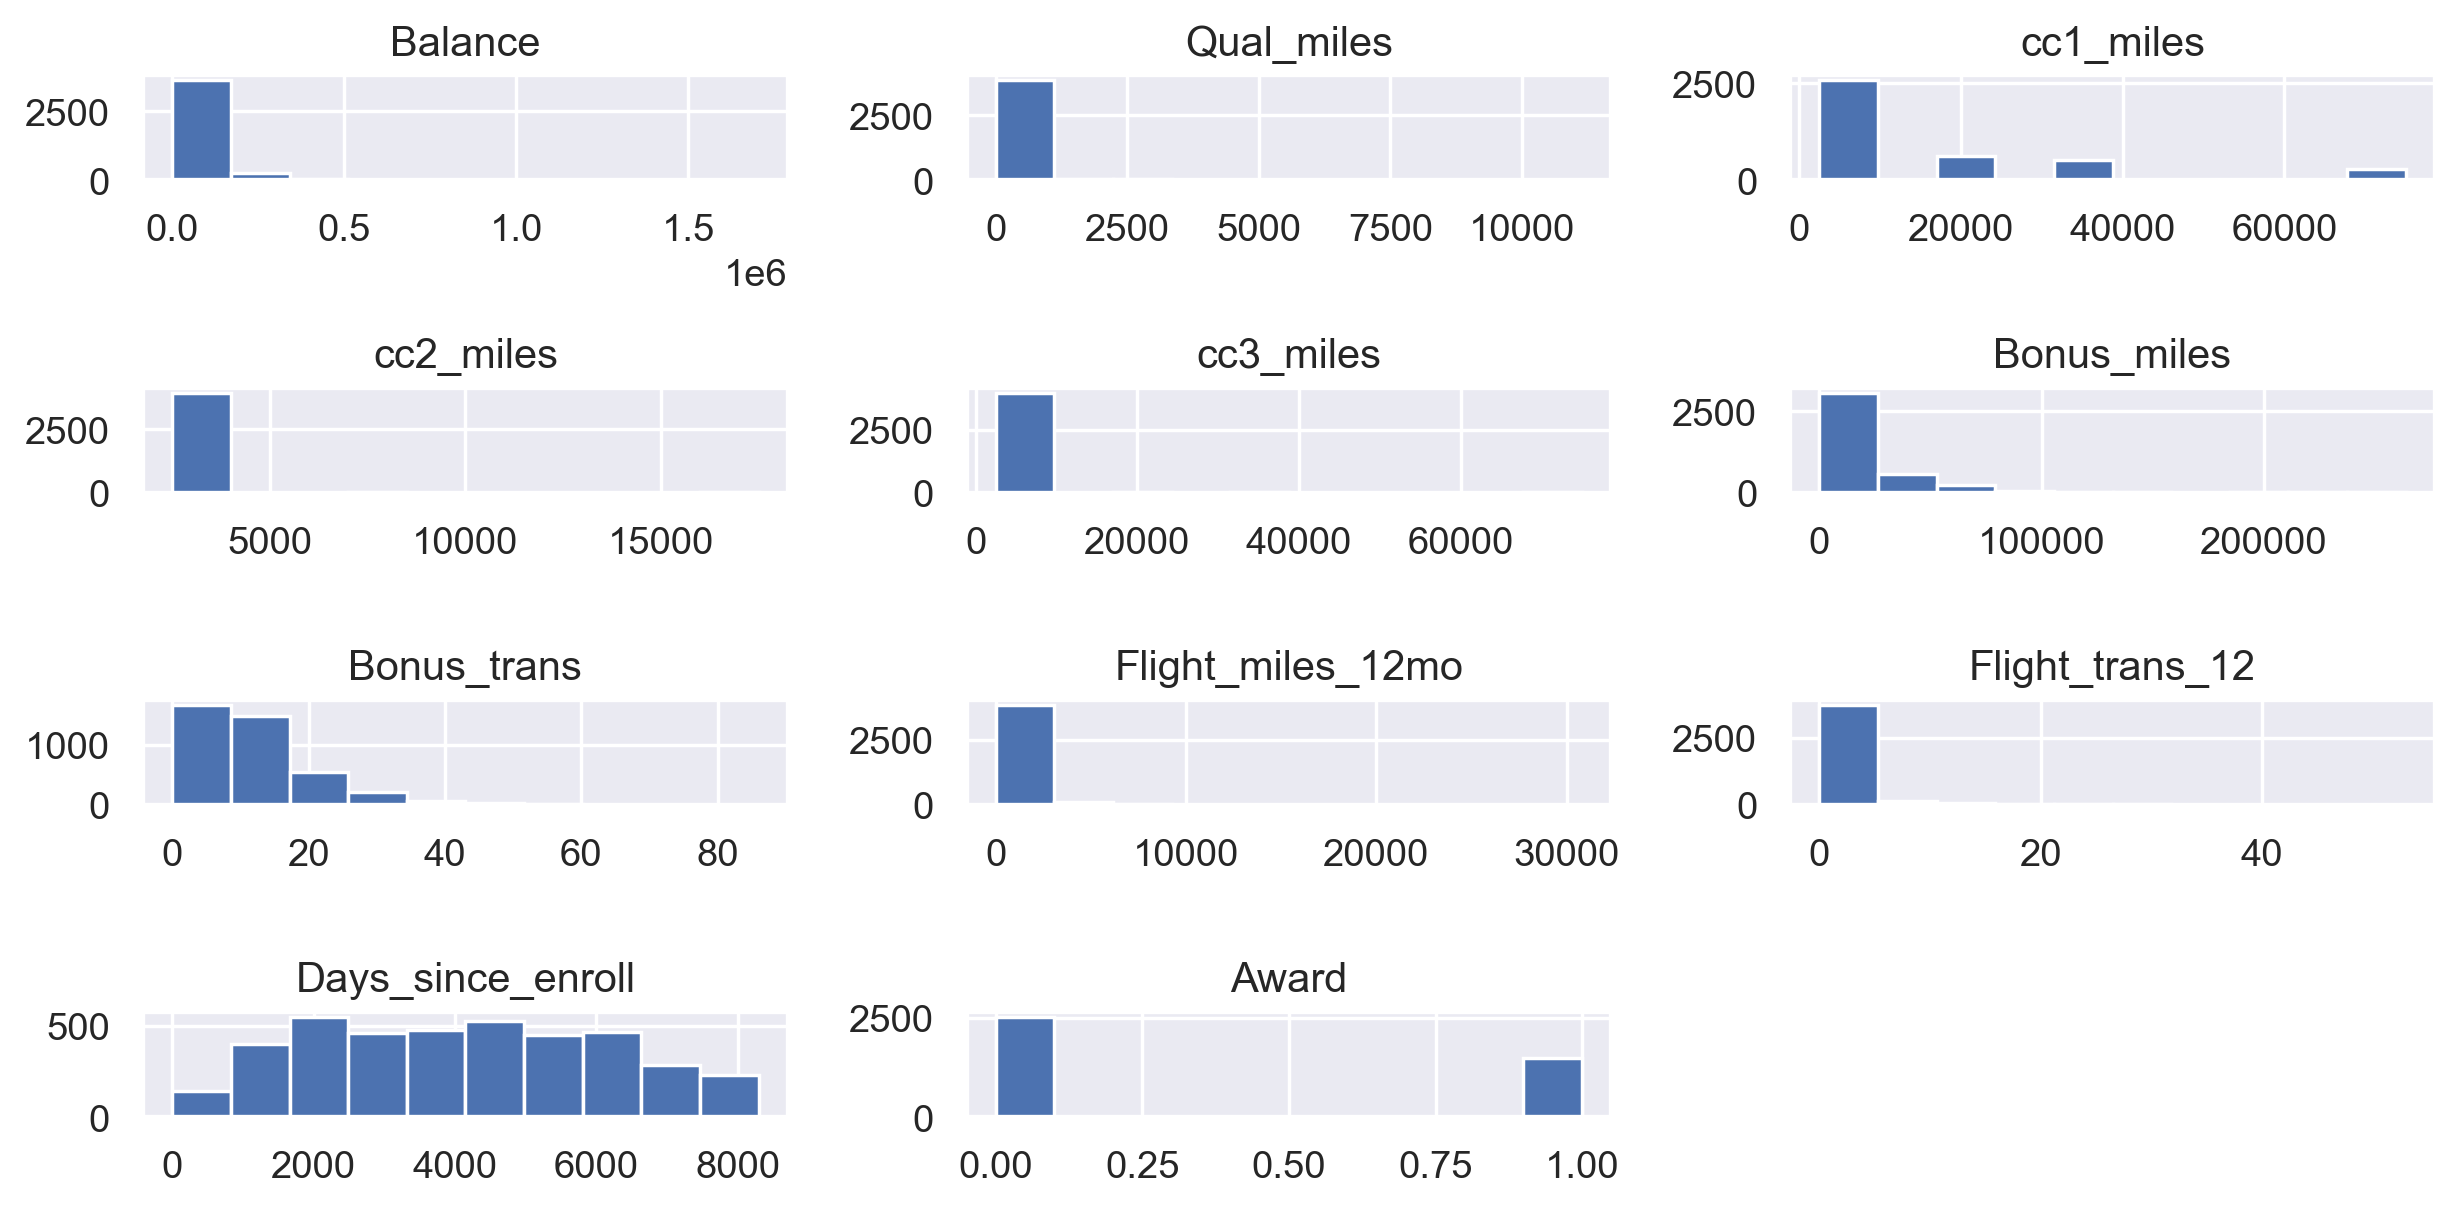

In [104]:
df.hist()
plt.tight_layout()

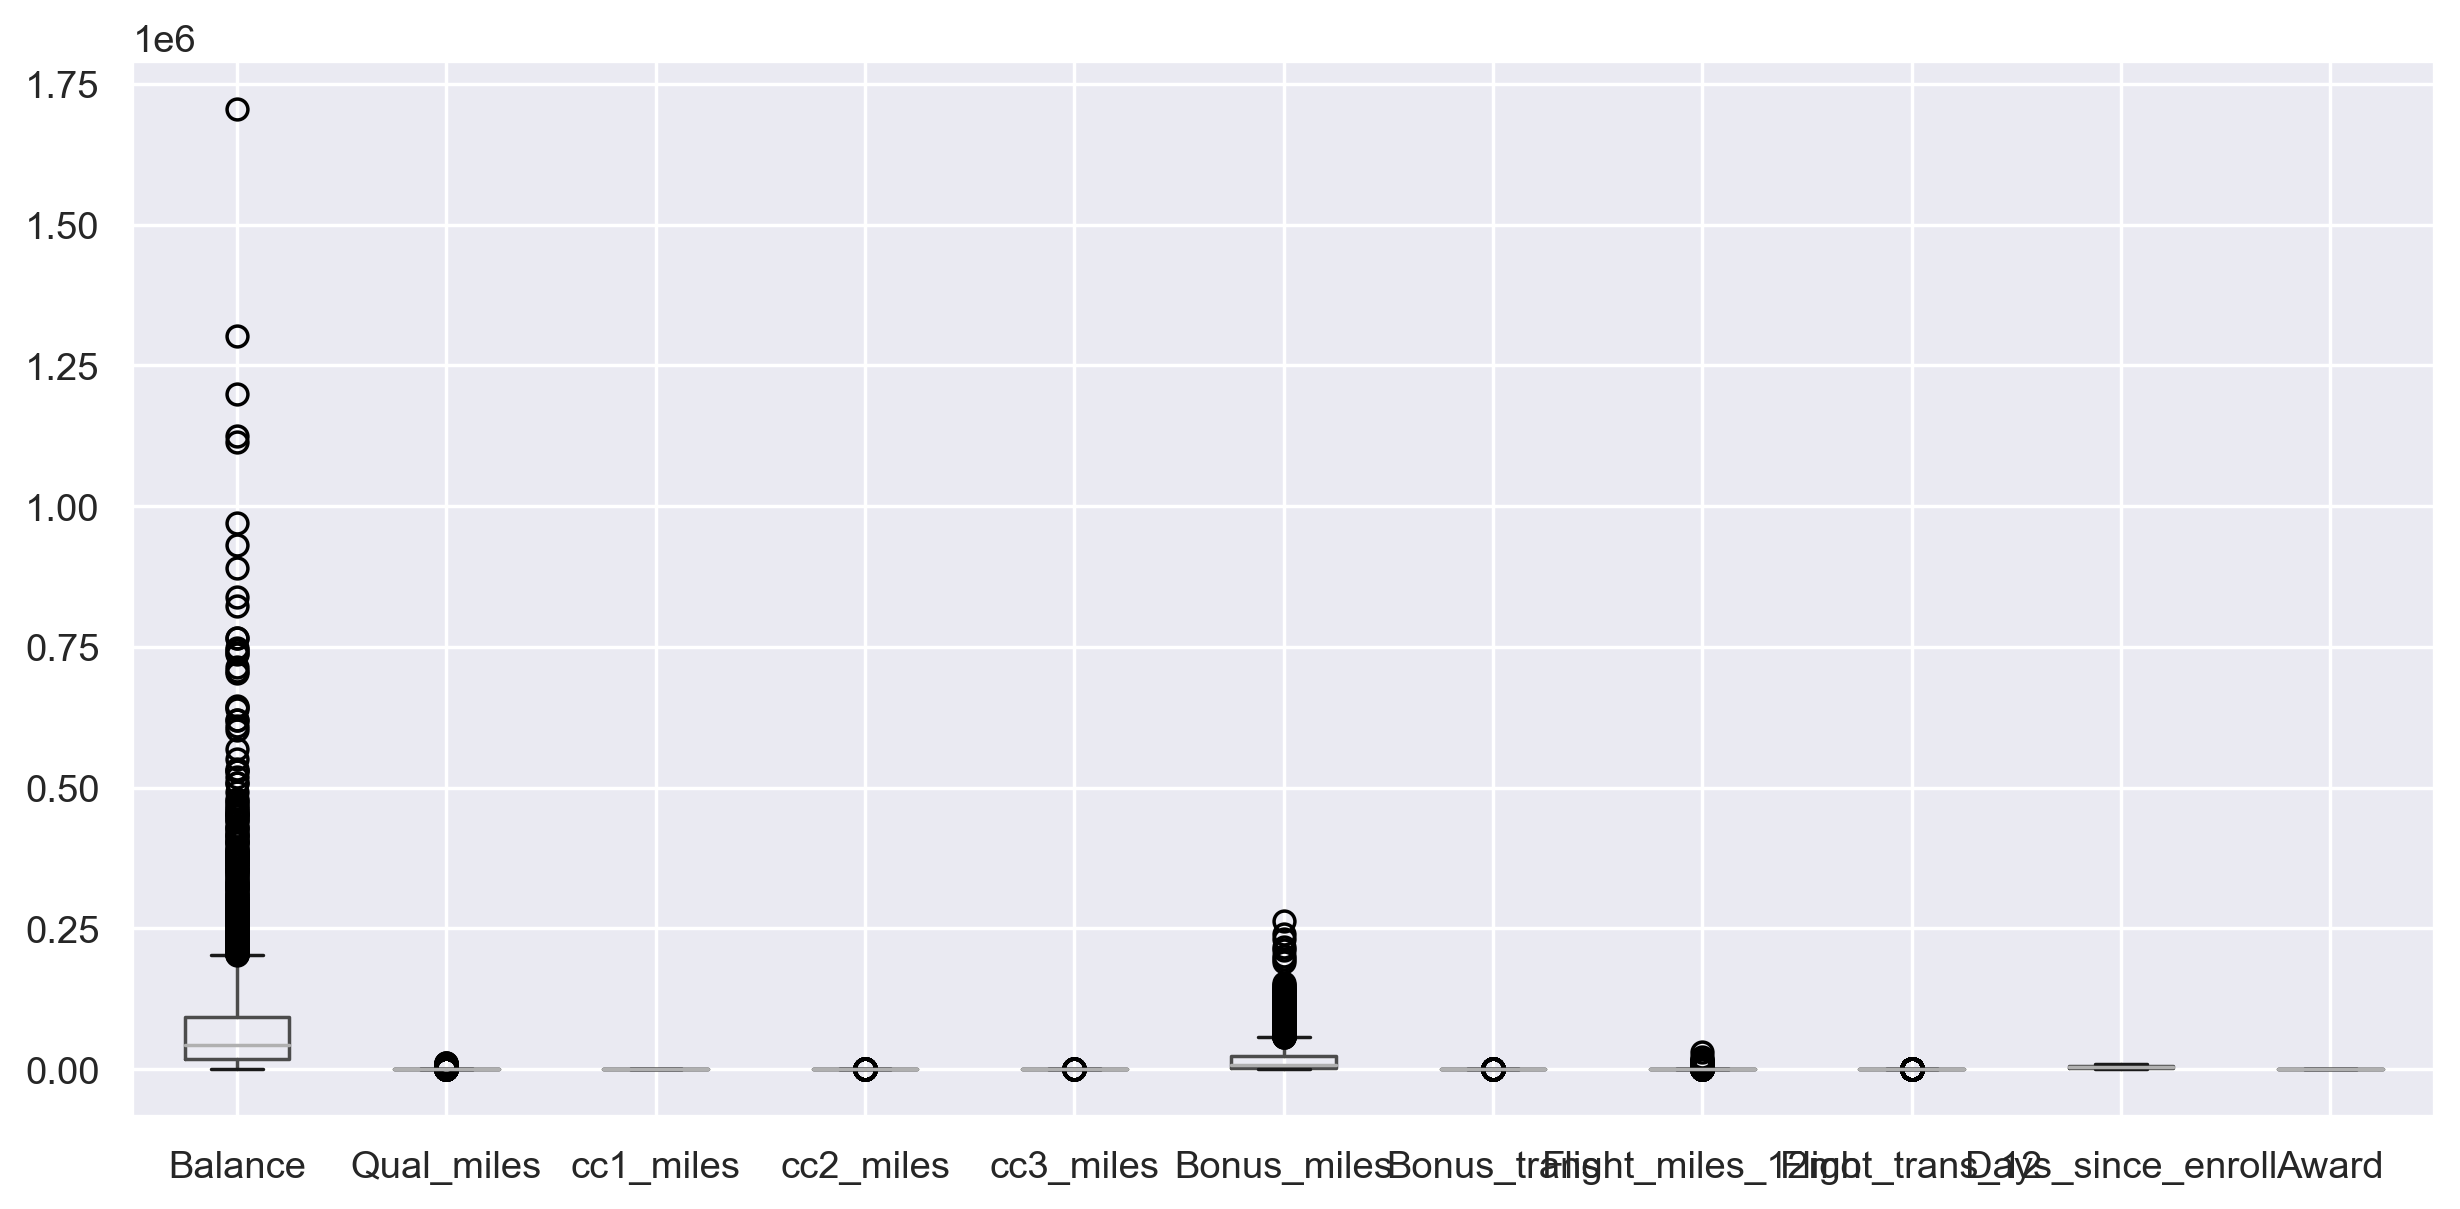

In [19]:
df.boxplot()
plt.tight_layout()

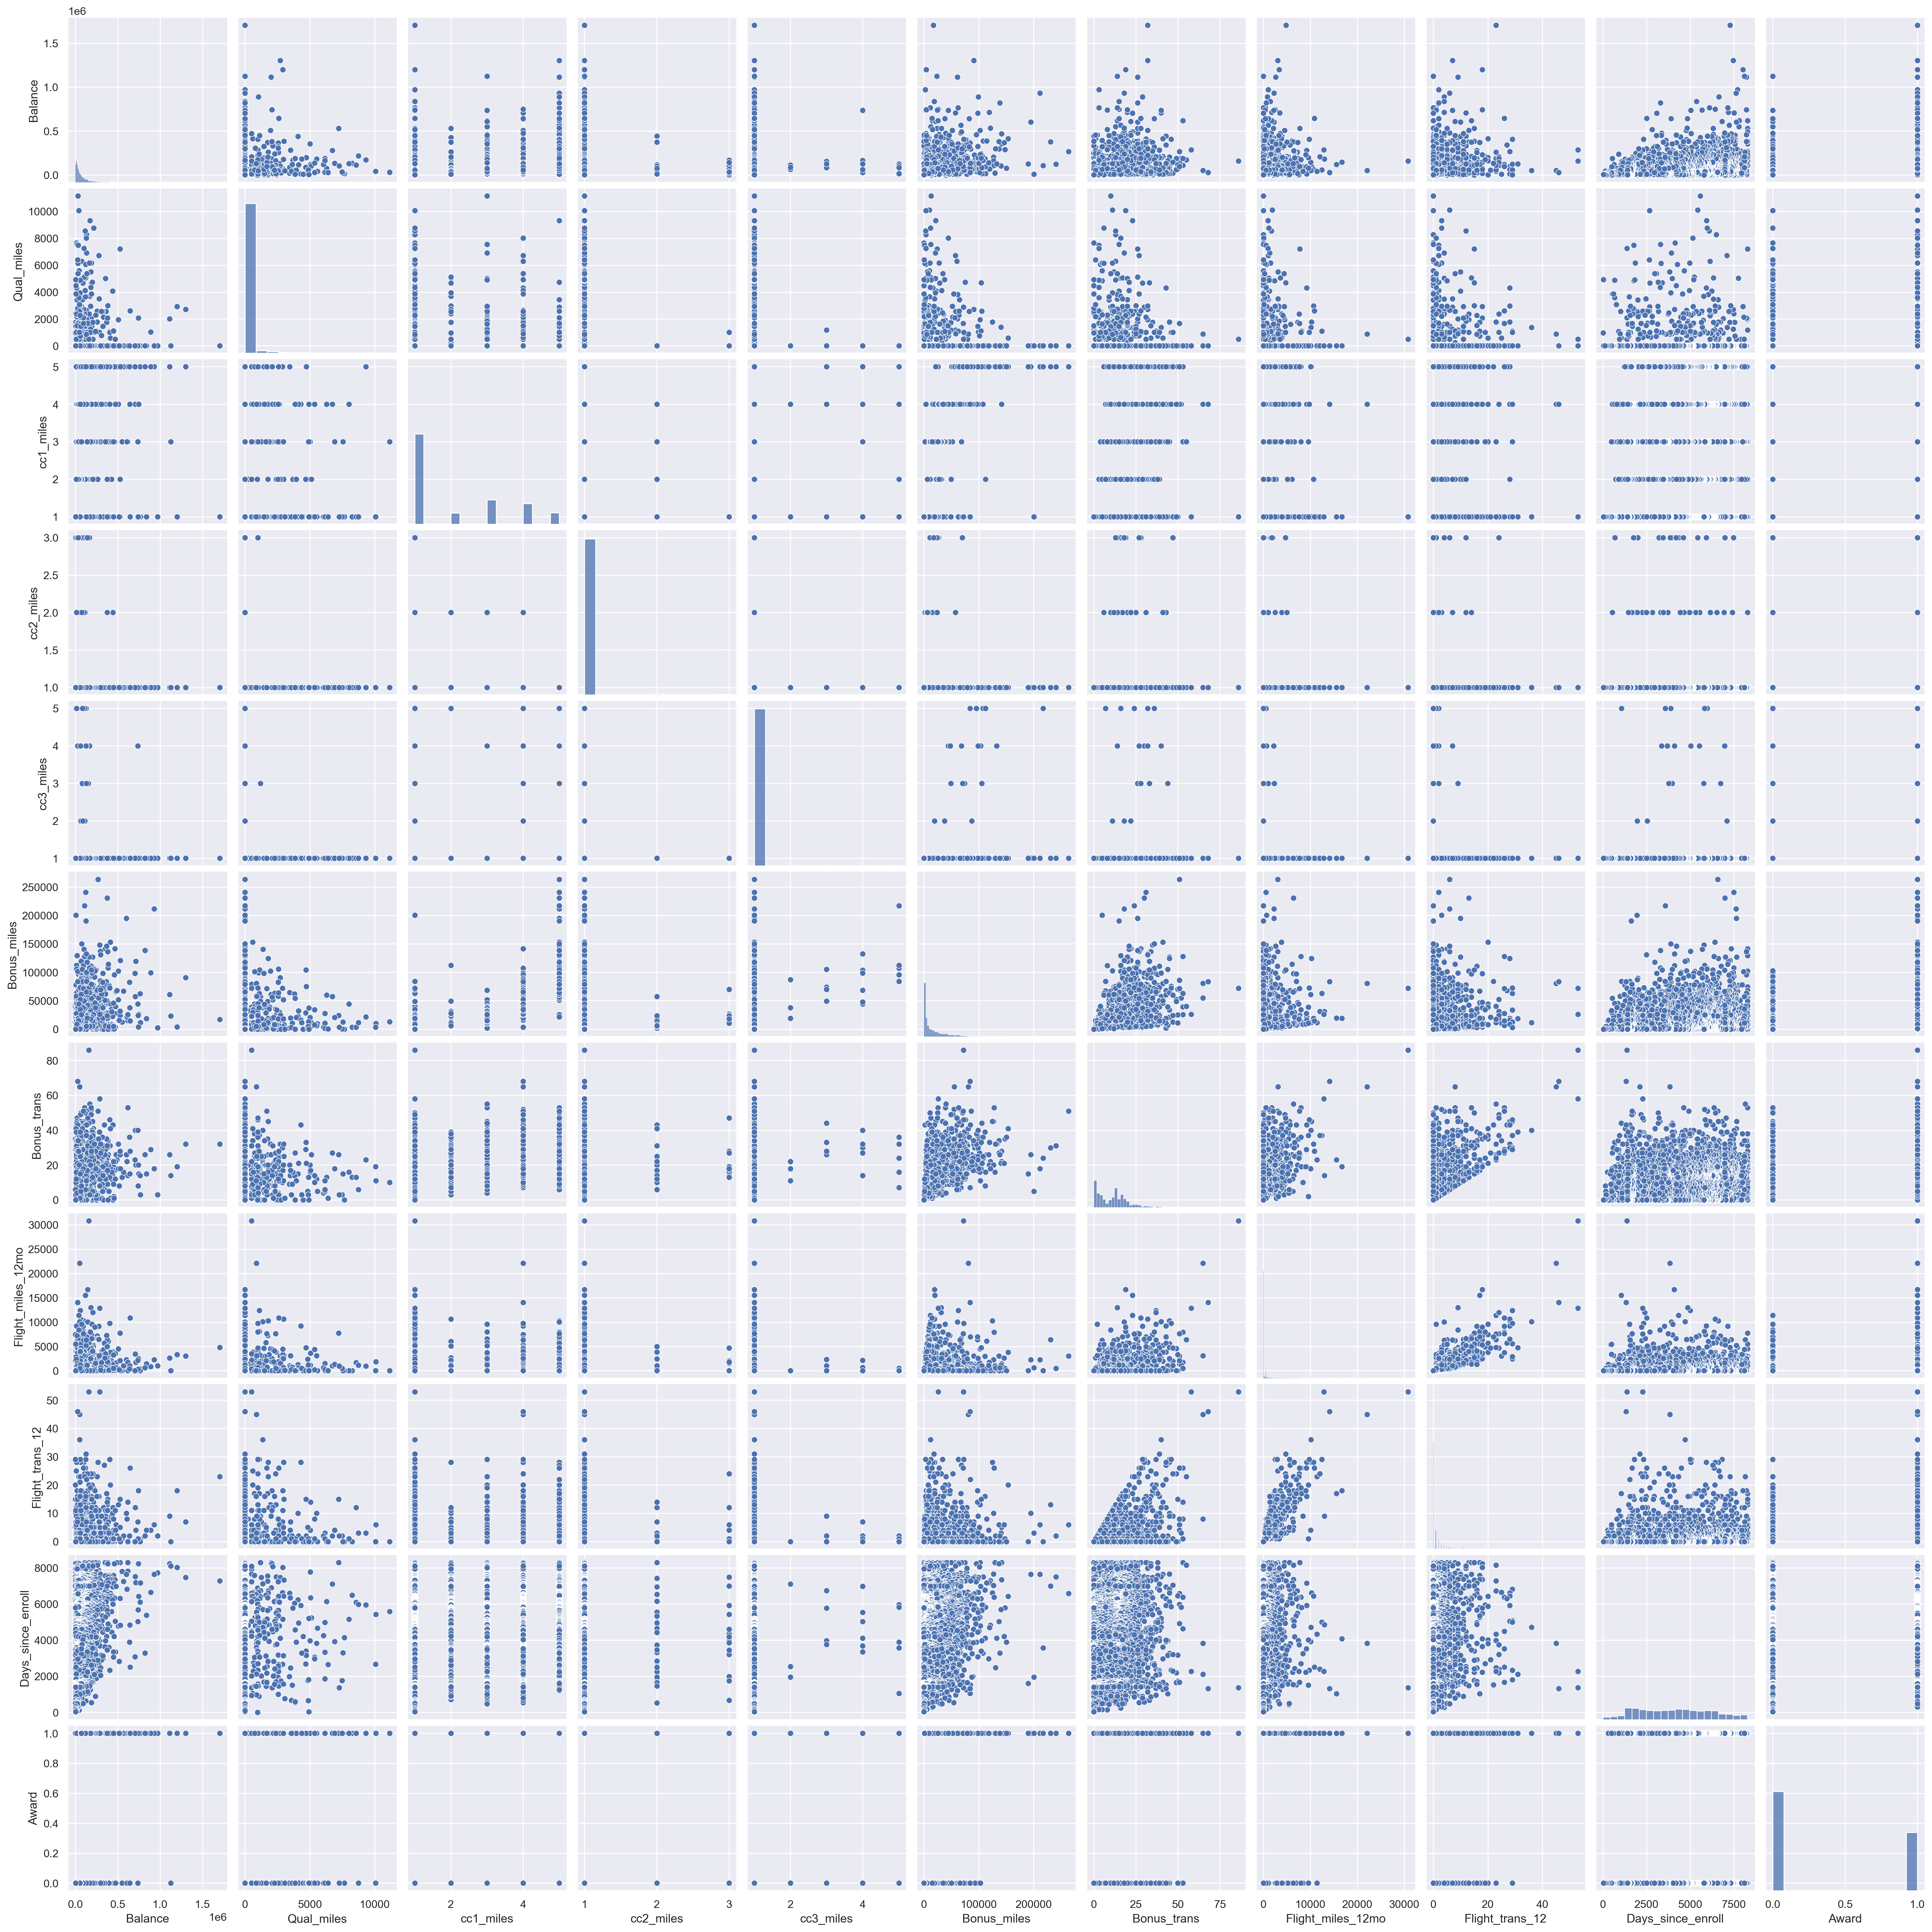

In [20]:
sns.pairplot(df)

In [21]:
df.corr()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Balance            1.000000    0.108696   0.338252  -0.008822   0.035234   
Qual_miles         0.108696    1.000000   0.007896  -0.013928  -0.007782   
cc1_miles          0.338252    0.007896   1.000000  -0.068247   0.060548   
cc2_miles         -0.008822   -0.013928  -0.068247   1.000000  -0.006168   
cc3_miles          0.035234   -0.007782   0.060548  -0.006168   1.000000   
Bonus_miles        0.403410    0.030990   0.825177  -0.003987   0.204136   
Bonus_trans        0.324797    0.050678   0.608867   0.064381   0.097312   
Flight_miles_12mo  0.217509    0.126761   0.037310   0.010590  -0.001783   
Flight_trans_12    0.255656    0.143990   0.041267   0.028276  -0.001122   
Days_since_enroll  0.262975    0.017259   0.230674  -0.005838   0.010815   
Award              0.178380    0.095228   0.335358   0.005314   0.023474   

                   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Balance               0.403410     0.324797           0.217509   
Qual_miles            0.030990     0.050678           0.126761   
cc1_miles             0.825177     0.608867           0.037310   
cc2_miles            -0.003987     0.064381           0.010590   
cc3_miles             0.204136     0.097312          -0.001783   
Bonus_miles           1.000000     0.603114           0.183492   
Bonus_trans           0.603114     1.000000           0.377190   
Flight_miles_12mo     0.183492     0.377190           1.000000   
Flight_trans_12       0.185211     0.432341           0.869189   
Days_since_enroll     0.210232     0.160953           0.037178   
Award                 0.373421     0.333747           0.217671   

                   Flight_trans_12  Days_since_enroll     Award  
Balance                   0.255656           0.262975  0.178380  
Qual_miles                0.143990           0.017259  0.095228  
cc1_miles                 0.041267           0.230674  0.335358  
cc2_miles                 0.028276          -0.005838  0.005314  
cc3_miles                -0.001122           0.010815  0.023474  
Bonus_miles               0.185211           0.210232  0.373421  
Bonus_trans               0.432341           0.160953  0.333747  
Flight_miles_12mo         0.869189           0.037178  0.217671  
Flight_trans_12           1.000000           0.059161  0.247862  
Days_since_enroll         0.059161           1.000000  0.187936  
Award                     0.247862           0.187936  1.000000

<Axes: >

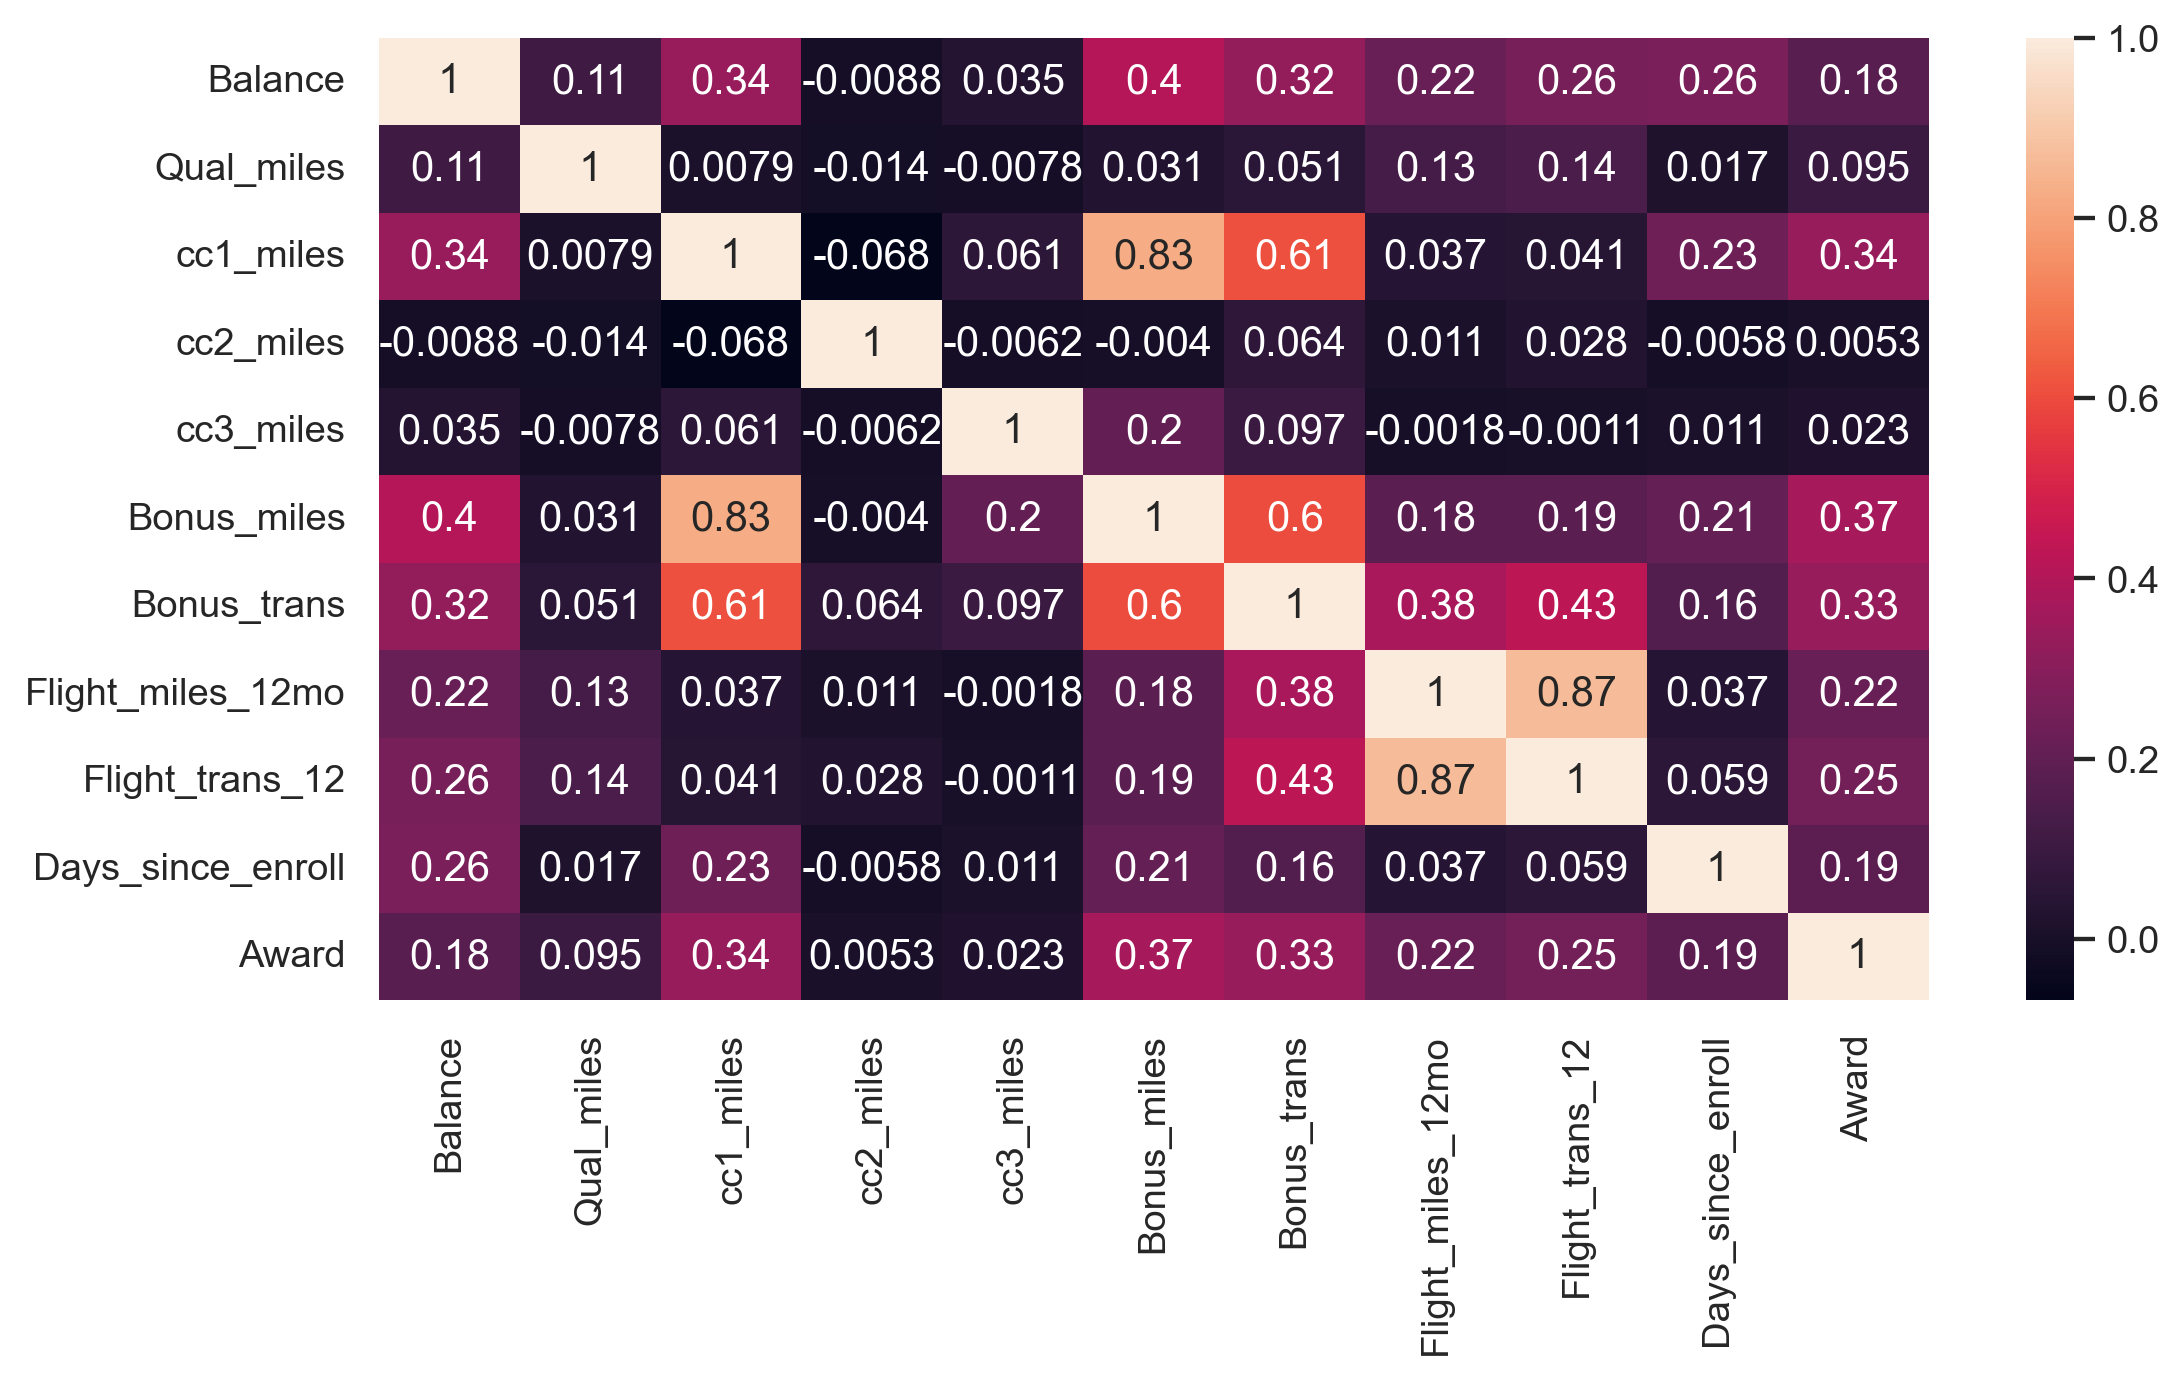

In [22]:
sns.heatmap(df.corr(),annot=True)

In [23]:
#Unique points in this correlation matrix:

#flight_trans_12 is positively correlated with flight_miles_12mo
#bonus_trans is positively correlated with cc1_miles
#bonus_trans is positively correlated with bonus_miles
#bonus_miles is positively correlated with cc1_miles


In [194]:
# Computing 90th percentile and replacing the outliers with 90th percentile
p_90 = np.percentile(df['Balance'], 90)
df.loc[df.Balance > p_90, 'Balance'] = np.nan
df.fillna(p_90,inplace=True)
p_90 = np.percentile(df['Qual_miles'], 90)
df.loc[df.Qual_miles > p_90, 'Qual_miles'] = np.nan
df.fillna(p_90,inplace=True)
p_90 = np.percentile(df['cc1_miles'], 90)
df.loc[df.cc1_miles > p_90, 'cc1_miles'] = np.nan
df.fillna(p_90,inplace=True)
p_90 = np.percentile(df['cc2_miles'], 90)
df.loc[df.cc2_miles > p_90, 'cc2_miles'] = np.nan
df.fillna(p_90,inplace=True)
p_90 = np.percentile(df['cc3_miles'], 90)
df.loc[df.cc3_miles > p_90, 'cc3_miles'] = np.nan
df.fillna(p_90,inplace=True)
p_90 = np.percentile(df['Bonus_miles'], 90)
df.loc[df.Bonus_miles > p_90, 'Bonus_miles'] = np.nan
df.fillna(p_90,inplace=True)
p_90 = np.percentile(df['Bonus_trans'], 90)
df.loc[df.Bonus_trans > p_90, 'Bonus_trans'] = np.nan
df.fillna(p_90,inplace=True)
p_90 = np.percentile(df['Flight_miles_12mo'], 90)
df.loc[df.Flight_miles_12mo > p_90, 'Flight_miles_12mo'] = np.nan
df.fillna(p_90,inplace=True)
p_90 = np.percentile(df['Flight_trans_12'], 90)
df.loc[df.Flight_trans_12 > p_90, 'Flight_trans_12'] = np.nan
df.fillna(p_90,inplace=True)

In [195]:
# data preprocessing

In [196]:
df.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [197]:
from sklearn.preprocessing import StandardScaler

In [198]:
sc = StandardScaler()

x = sc.fit_transform(df)

x = pd.DataFrame(x, columns=df.columns)
x


Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    -0.627946         0.0  -0.709186        0.0        0.0    -0.882870   
1    -0.800424         0.0  -0.709186        0.0        0.0    -0.880370   
2    -0.371895         0.0  -0.709186        0.0        0.0    -0.642037   
3    -0.887021         0.0  -0.709186        0.0        0.0    -0.862989   
4     0.721194         0.0   1.830779        0.0        0.0     1.747211   
...        ...         ...        ...        ...        ...          ...   
3993 -0.815309         0.0  -0.709186        0.0        0.0    -0.373576   
3994  0.074485         0.0  -0.709186        0.0        0.0    -0.833655   
3995  0.253029         0.0   0.379370        0.0        0.0     0.658428   
3996 -0.109370         0.0  -0.709186        0.0        0.0    -0.862989   
3997 -1.114950         0.0  -0.709186        0.0        0.0    -0.893482   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0       -1.277234          -0.559060        -0.575106           1.395235   
1       -1.146335          -0.559060        -0.575106           1.379736   
2       -0.884536          -0.559060        -0.575106           1.411702   
3       -1.277234          -0.559060        -0.575106           1.371987   
4        1.602551           2.413232         2.409997           1.363754   
...           ...                ...              ...                ...   
3993    -0.884536          -0.082158         0.171169          -1.315506   
3994    -0.753637          -0.559060        -0.575106          -1.319381   
3995    -0.360939          -0.559060        -0.575106          -1.315990   
3996    -1.277234           0.633195         0.171169          -1.316475   
3997    -1.408133          -0.559060        -0.575106          -1.317928   

         Award  
0    -0.767072  
1    -0.767072  
2    -0.767072  
3    -0.767072  
4     1.303659  
...        ...  
3993  1.303659  
3994  1.303659  
3995  1.303659  
3996 -0.767072  
3997 -0.767072  

[3998 rows x 11 columns]

In [199]:
## dendrogram with different parameters

In [200]:
from scipy.cluster import hierarchy

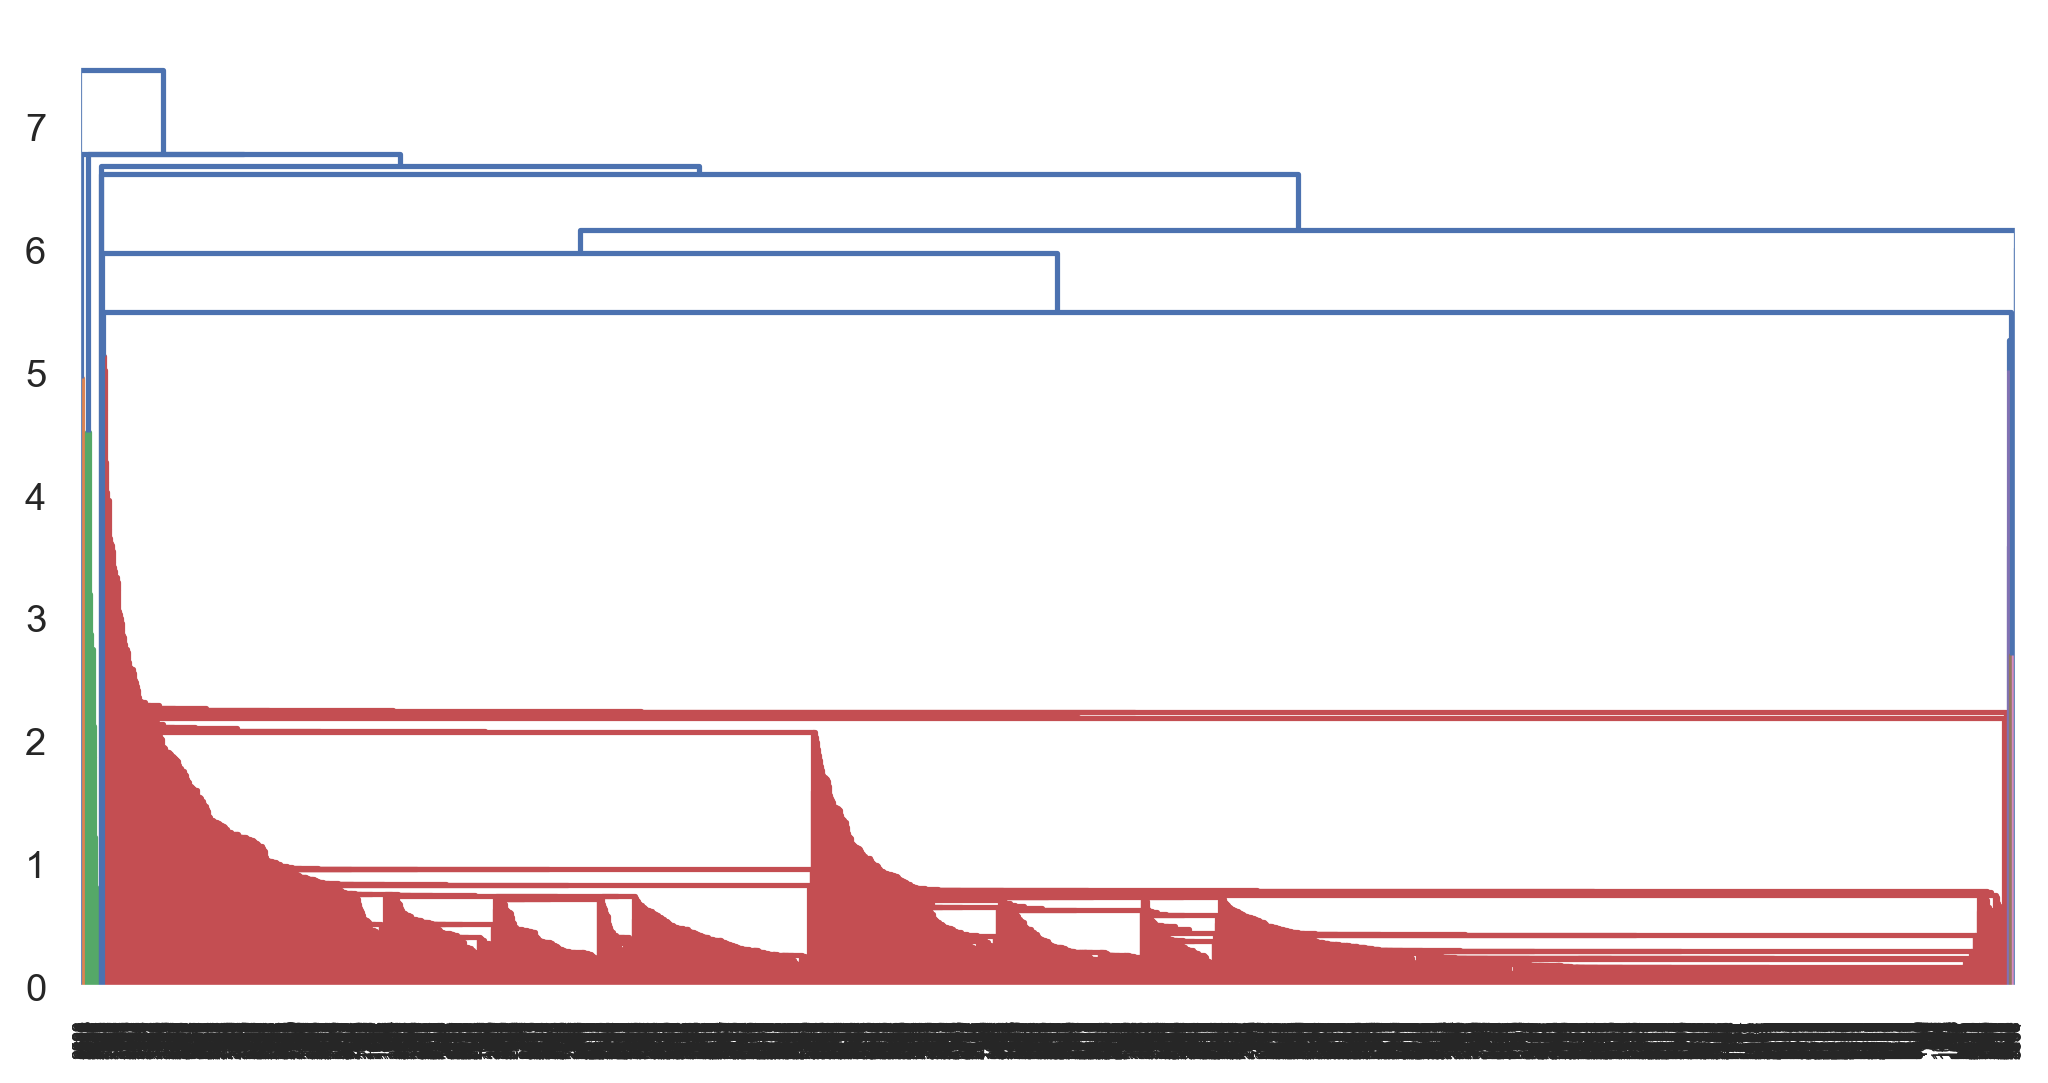

In [30]:
lk = hierarchy.linkage(x,method='single')
dendrogram = hierarchy.dendrogram(lk)

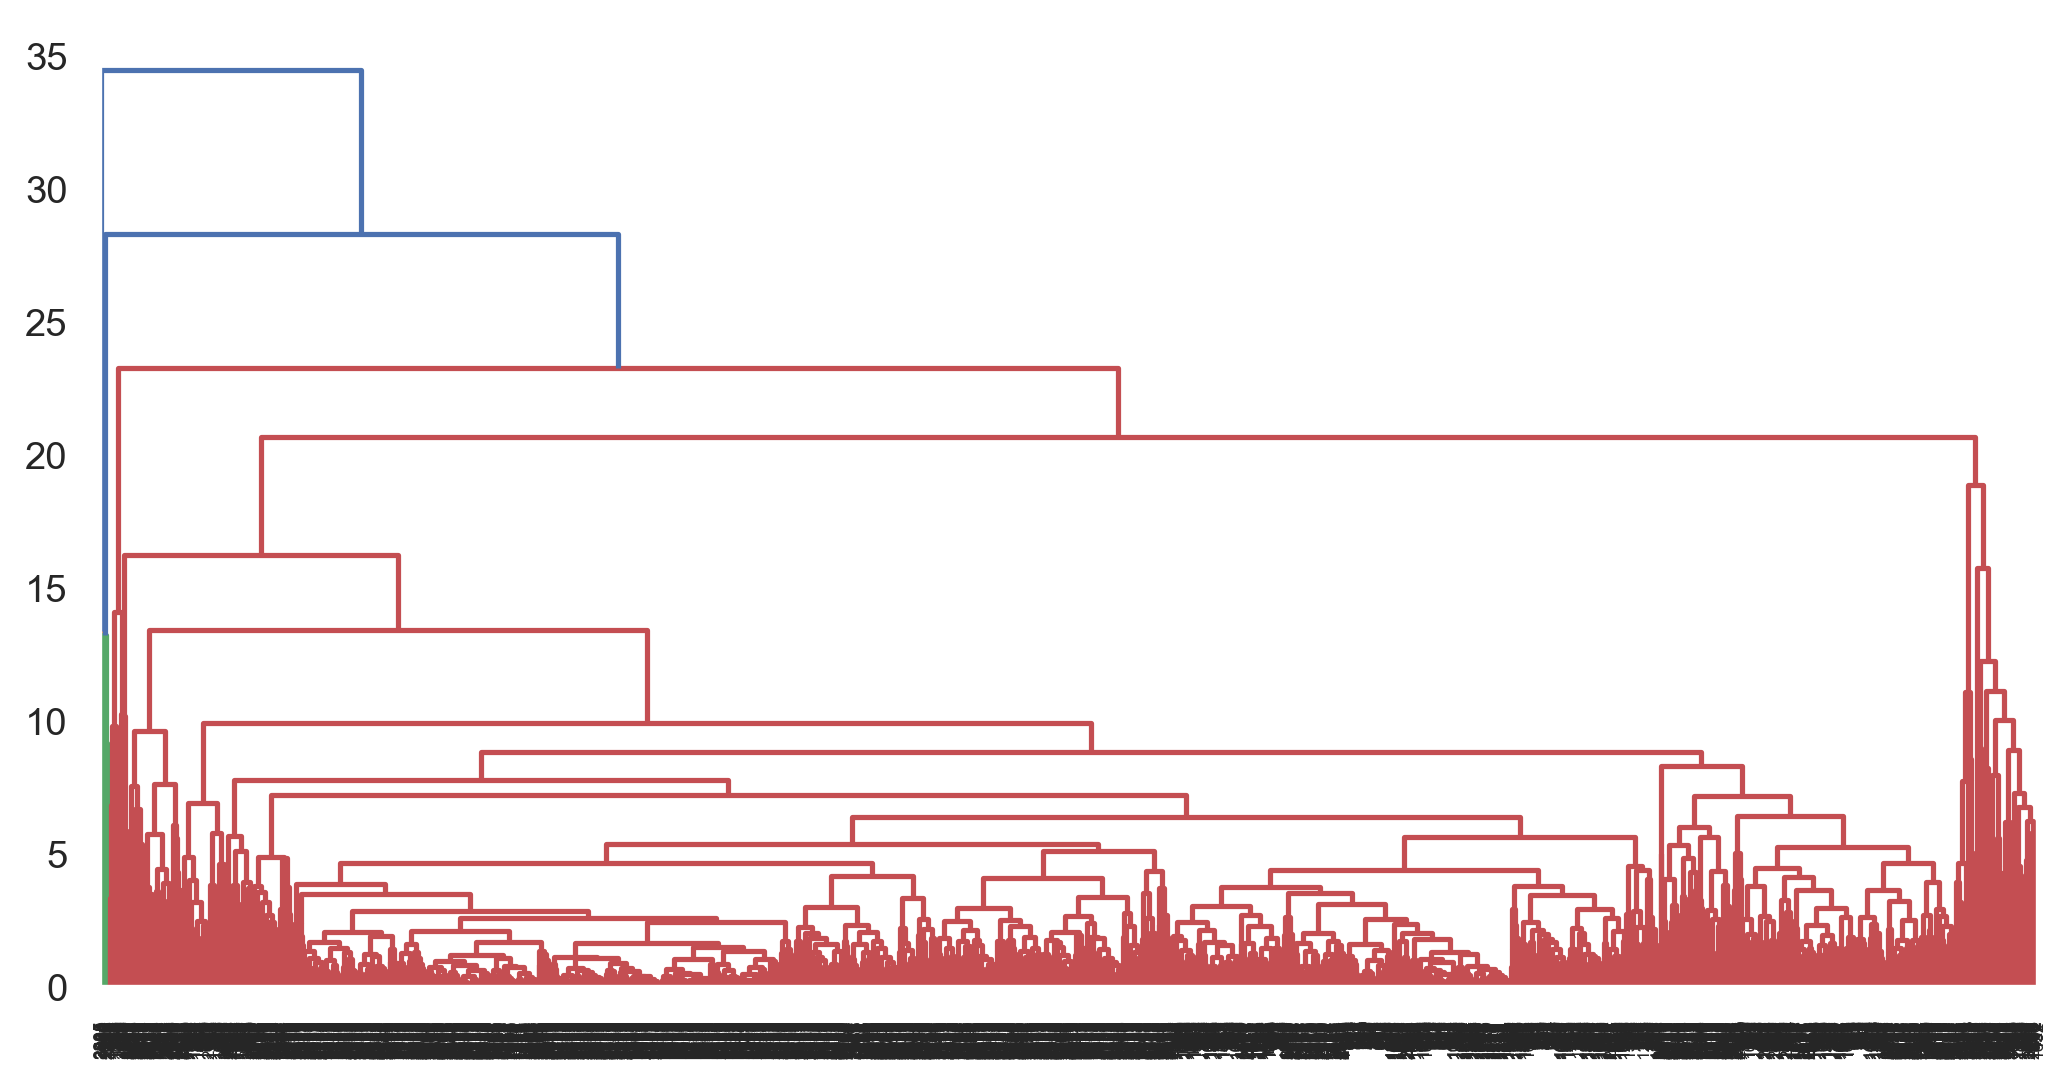

In [67]:
lk = hierarchy.linkage(x,method='complete')
dendrogram = hierarchy.dendrogram(lk)

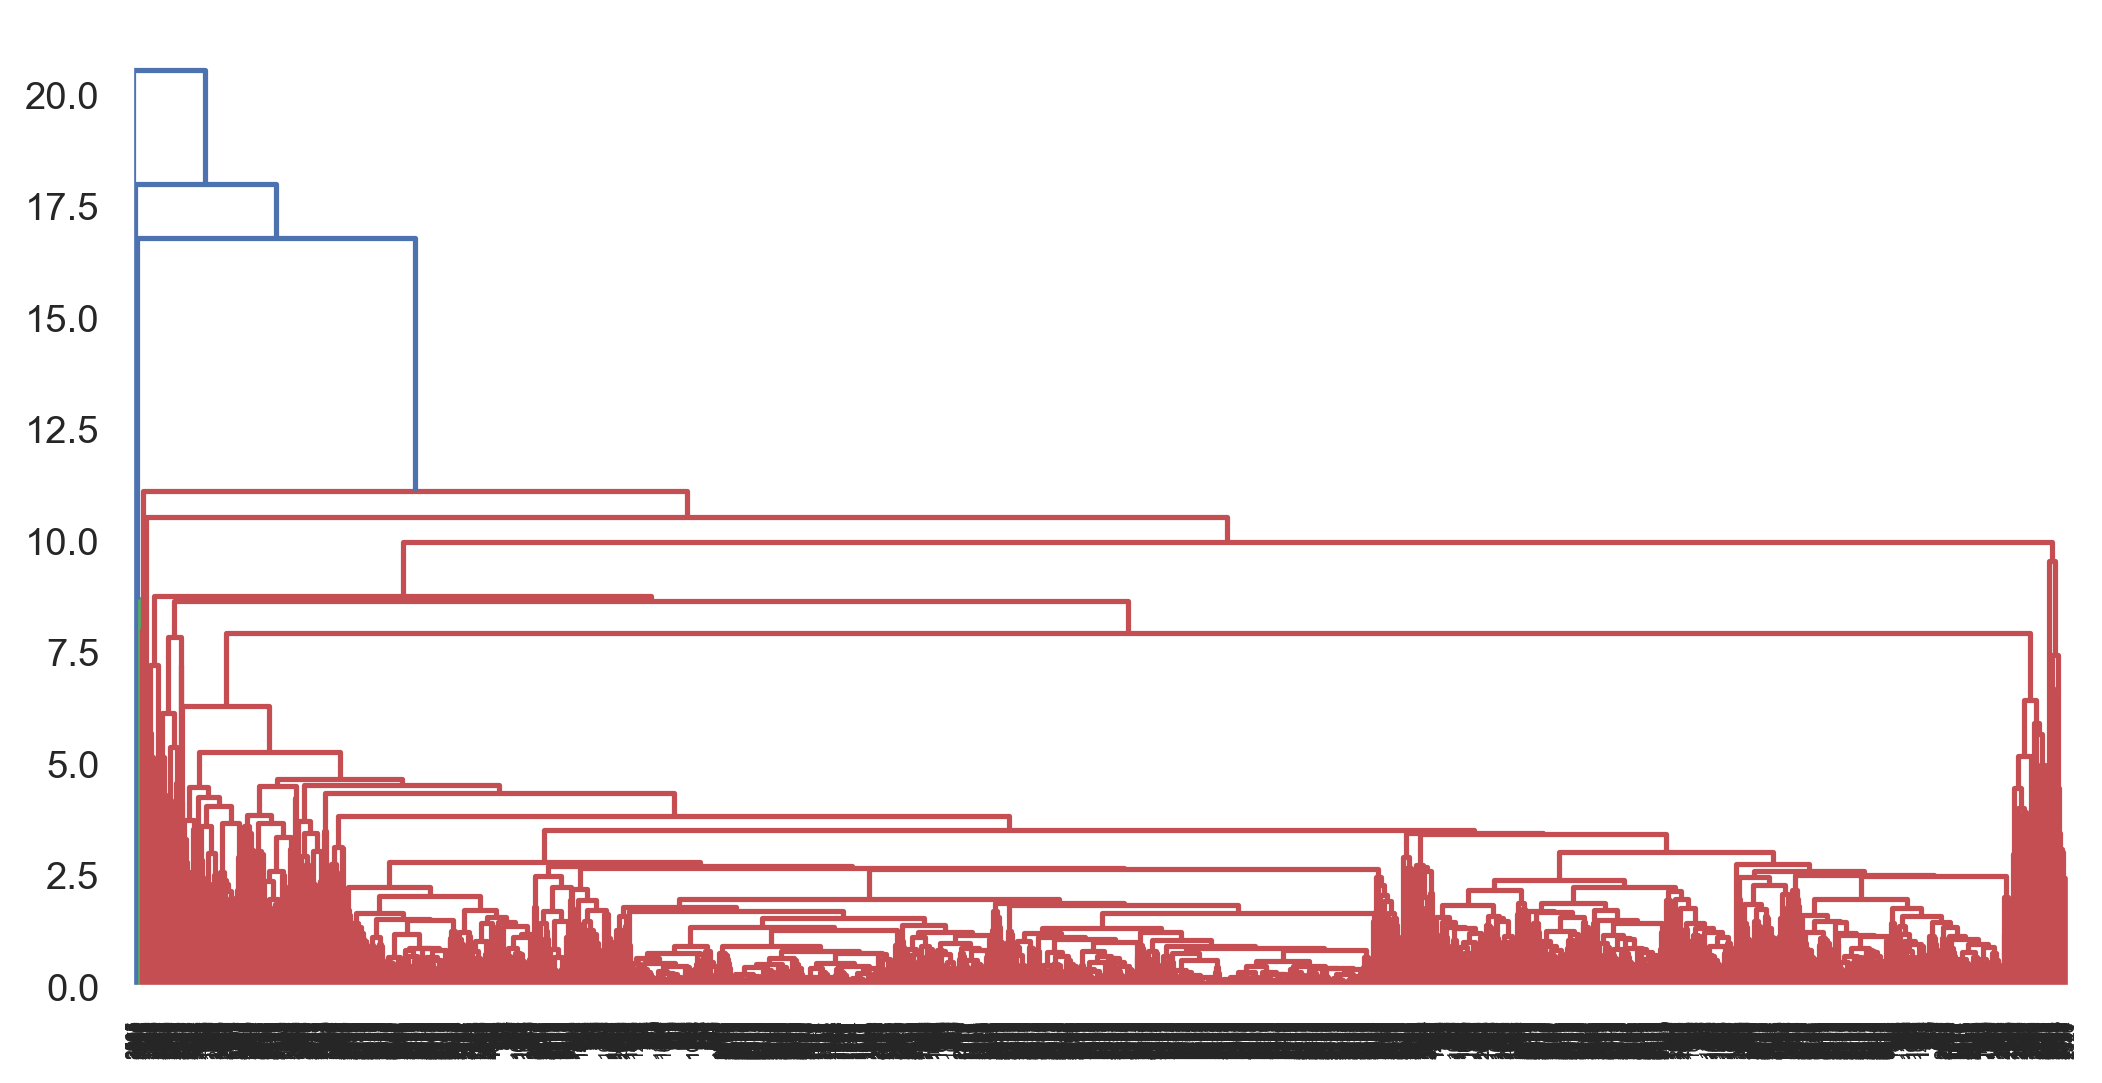

In [32]:
lk = hierarchy.linkage(x,method='average')
dendrogram = hierarchy.dendrogram(lk)

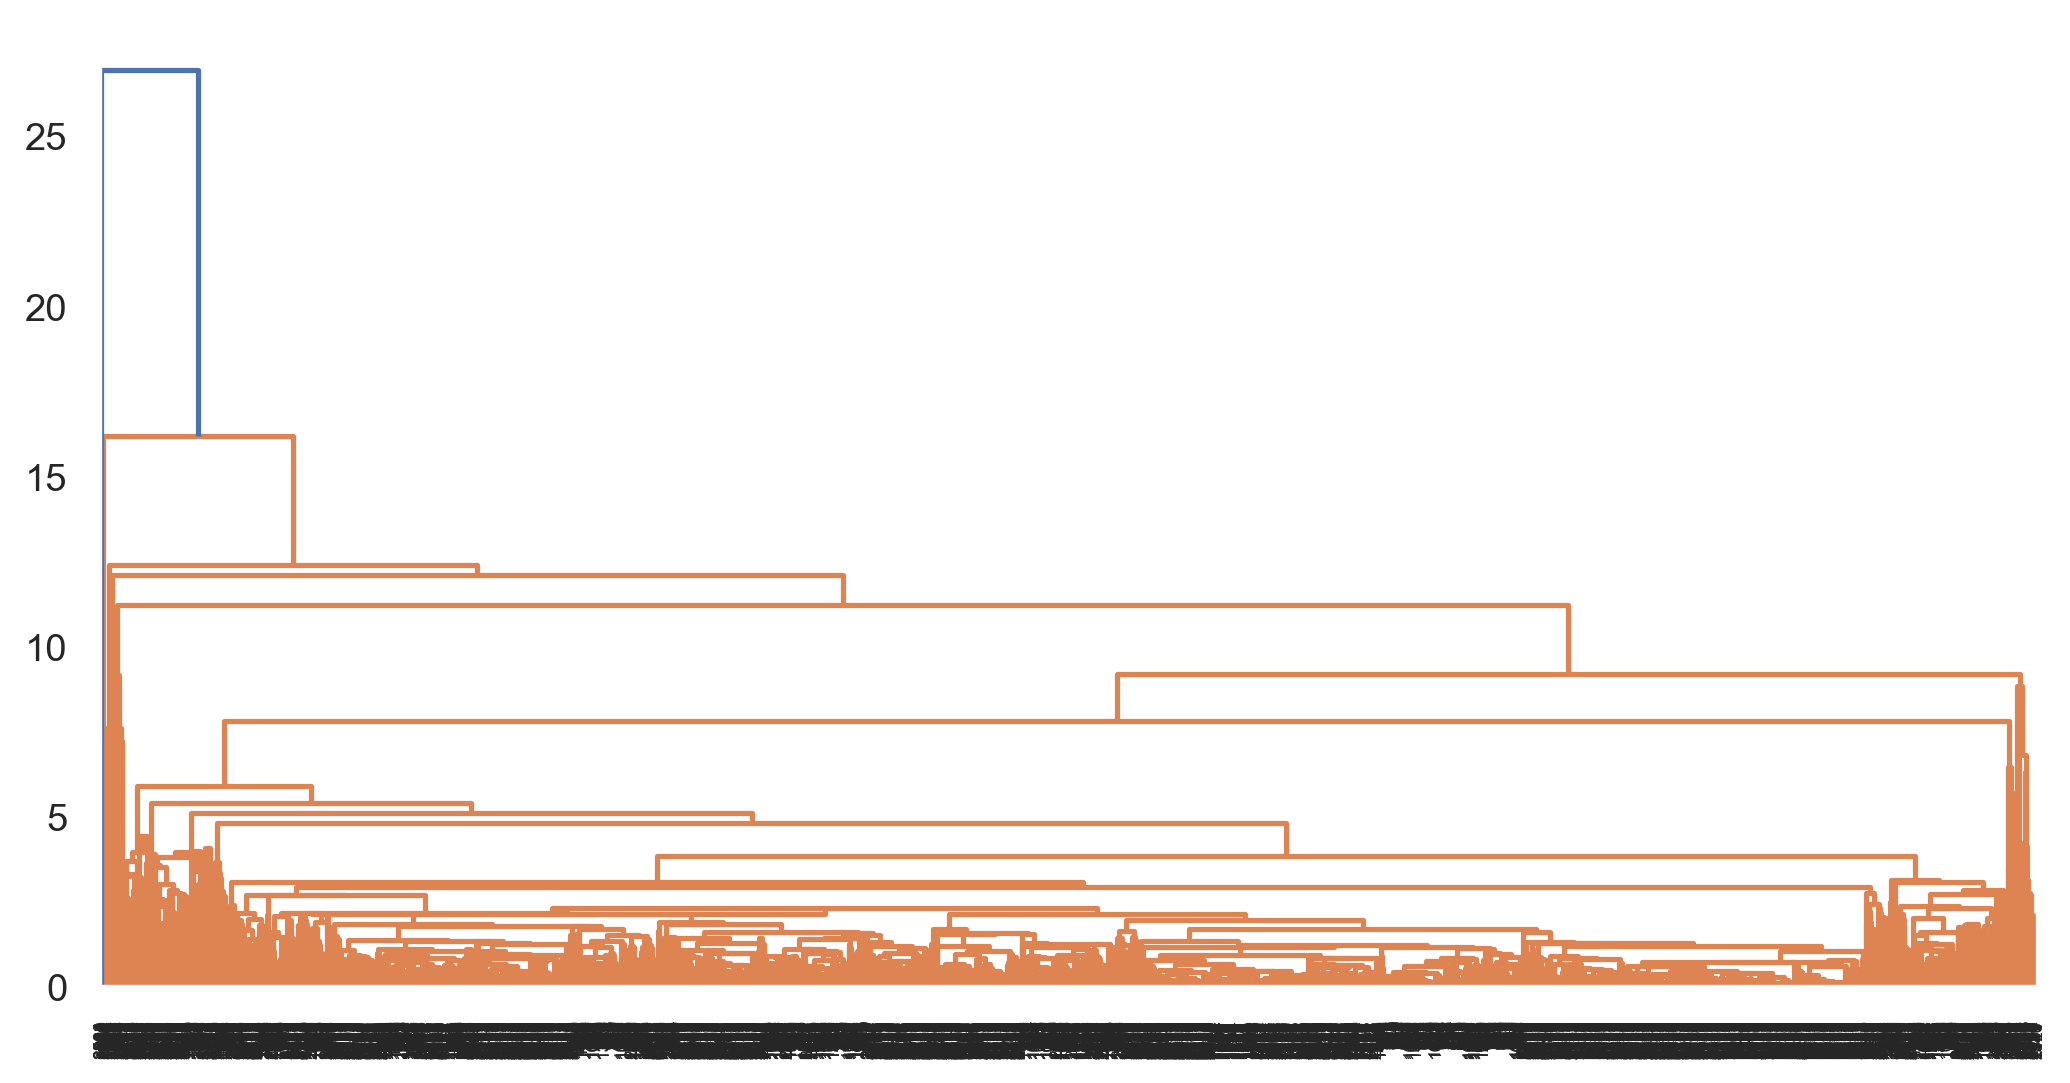

In [33]:
lk = hierarchy.linkage(x,method='centroid')
dendrogram = hierarchy.dendrogram(lk)

In [201]:
## hierarchial clustering is good for small dataset but we will still go with complete linkage method

In [202]:
## model building

In [203]:
from sklearn.cluster import AgglomerativeClustering

In [204]:
hc = AgglomerativeClustering(n_clusters=5)
ypred = hc.fit_predict(x)
ypred

array([1, 1, 1, ..., 0, 4, 1], dtype=int64)

In [205]:
df['Cluster'] = ypred
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1     28143.0         0.0     2500.0     2500.0     2500.0        174.0   
2     19244.0         0.0     2500.0     2500.0     2500.0        215.0   
3     41354.0         0.0     2500.0     2500.0     2500.0       4123.0   
4     14776.0         0.0     2500.0     2500.0     2500.0        500.0   
5     97752.0         0.0    37500.0     2500.0     2500.0      43300.0   
...       ...         ...        ...        ...        ...          ...   
4017  18476.0         0.0     2500.0     2500.0     2500.0       8525.0   
4018  64385.0         0.0     2500.0     2500.0     2500.0        981.0   
4019  73597.0         0.0    17500.0     2500.0     2500.0      25447.0   
4020  54899.0         0.0     2500.0     2500.0     2500.0        500.0   
4021   3016.0         0.0     2500.0     2500.0     2500.0          0.0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1             1.0                0.0              0.0               7000   
2             2.0                0.0              0.0               6968   
3             4.0                0.0              0.0               7034   
4             1.0                0.0              0.0               6952   
5            23.0             1246.5              4.0               6935   
...           ...                ...              ...                ...   
4017          4.0              200.0              1.0               1403   
4018          5.0                0.0              0.0               1395   
4019          8.0                0.0              0.0               1402   
4020          1.0              500.0              1.0               1401   
4021          0.0                0.0              0.0               1398   

      Award  Cluster  
ID#                   
1         0        1  
2         0        1  
3         0        1  
4         0        1  
5         1        3  
...     ...      ...  
4017      1        0  
4018      1        0  
4019      1        0  
4020      0        4  
4021      0        1  

[3998 rows x 12 columns]

In [206]:
## analyzing the clusters

In [207]:
df[df['Cluster']==0].mean()

Balance              67298.341284
Qual_miles               0.000000
cc1_miles             8744.266055
cc2_miles             2500.000000
cc3_miles             2500.000000
Bonus_miles          11356.124656
Bonus_trans             10.966743
Flight_miles_12mo       76.883028
Flight_trans_12          0.290138
Days_since_enroll     4673.779817
Award                    0.780963
Cluster                  0.000000
dtype: float64

In [208]:
df[df['Cluster']==1].mean()

Balance              32077.364330
Qual_miles               0.000000
cc1_miles             4581.795818
cc2_miles             2500.000000
cc3_miles             2500.000000
Bonus_miles           4691.735424
Bonus_trans              6.678967
Flight_miles_12mo        2.367774
Flight_trans_12          0.018450
Days_since_enroll     3441.340713
Award                    0.000000
Cluster                  1.000000
dtype: float64

In [209]:
df.groupby('Cluster').agg('mean')

Balance  Qual_miles     cc1_miles  cc2_miles  cc3_miles  \
Cluster                                                                 
0        67298.341284         0.0   8744.266055     2500.0     2500.0   
1        32077.364330         0.0   4581.795818     2500.0     2500.0   
2        98599.646319         0.0  37438.650307     2500.0     2500.0   
3        95715.778995         0.0  17522.831050     2500.0     2500.0   
4        60961.622927         0.0   4646.341463     2500.0     2500.0   

          Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Cluster                                                                  
0        11356.124656    10.966743          76.883028         0.290138   
1         4691.735424     6.678967           2.367774         0.018450   
2        41974.516104    17.464724         134.356595         0.435583   
3        25533.066438    17.155251        1116.607306         3.563927   
4         6075.526585     8.985366         706.789024         2.324390   

         Days_since_enroll     Award  
Cluster                               
0              4673.779817  0.780963  
1              3441.340713  0.000000  
2              4848.432515  0.613497  
3              4746.856164  0.913242  
4              3797.719512  0.000000

In [243]:
# in cluster 3, there are highest number of passengers who had been awarded with free flights because they have taken
# more flights in the last 12 months as compared to other clusters after that paasengers in cluster 2 got
# awarded with free flight as they have higher balance

<Axes: xlabel='cc1_miles', ylabel='Bonus_miles'>

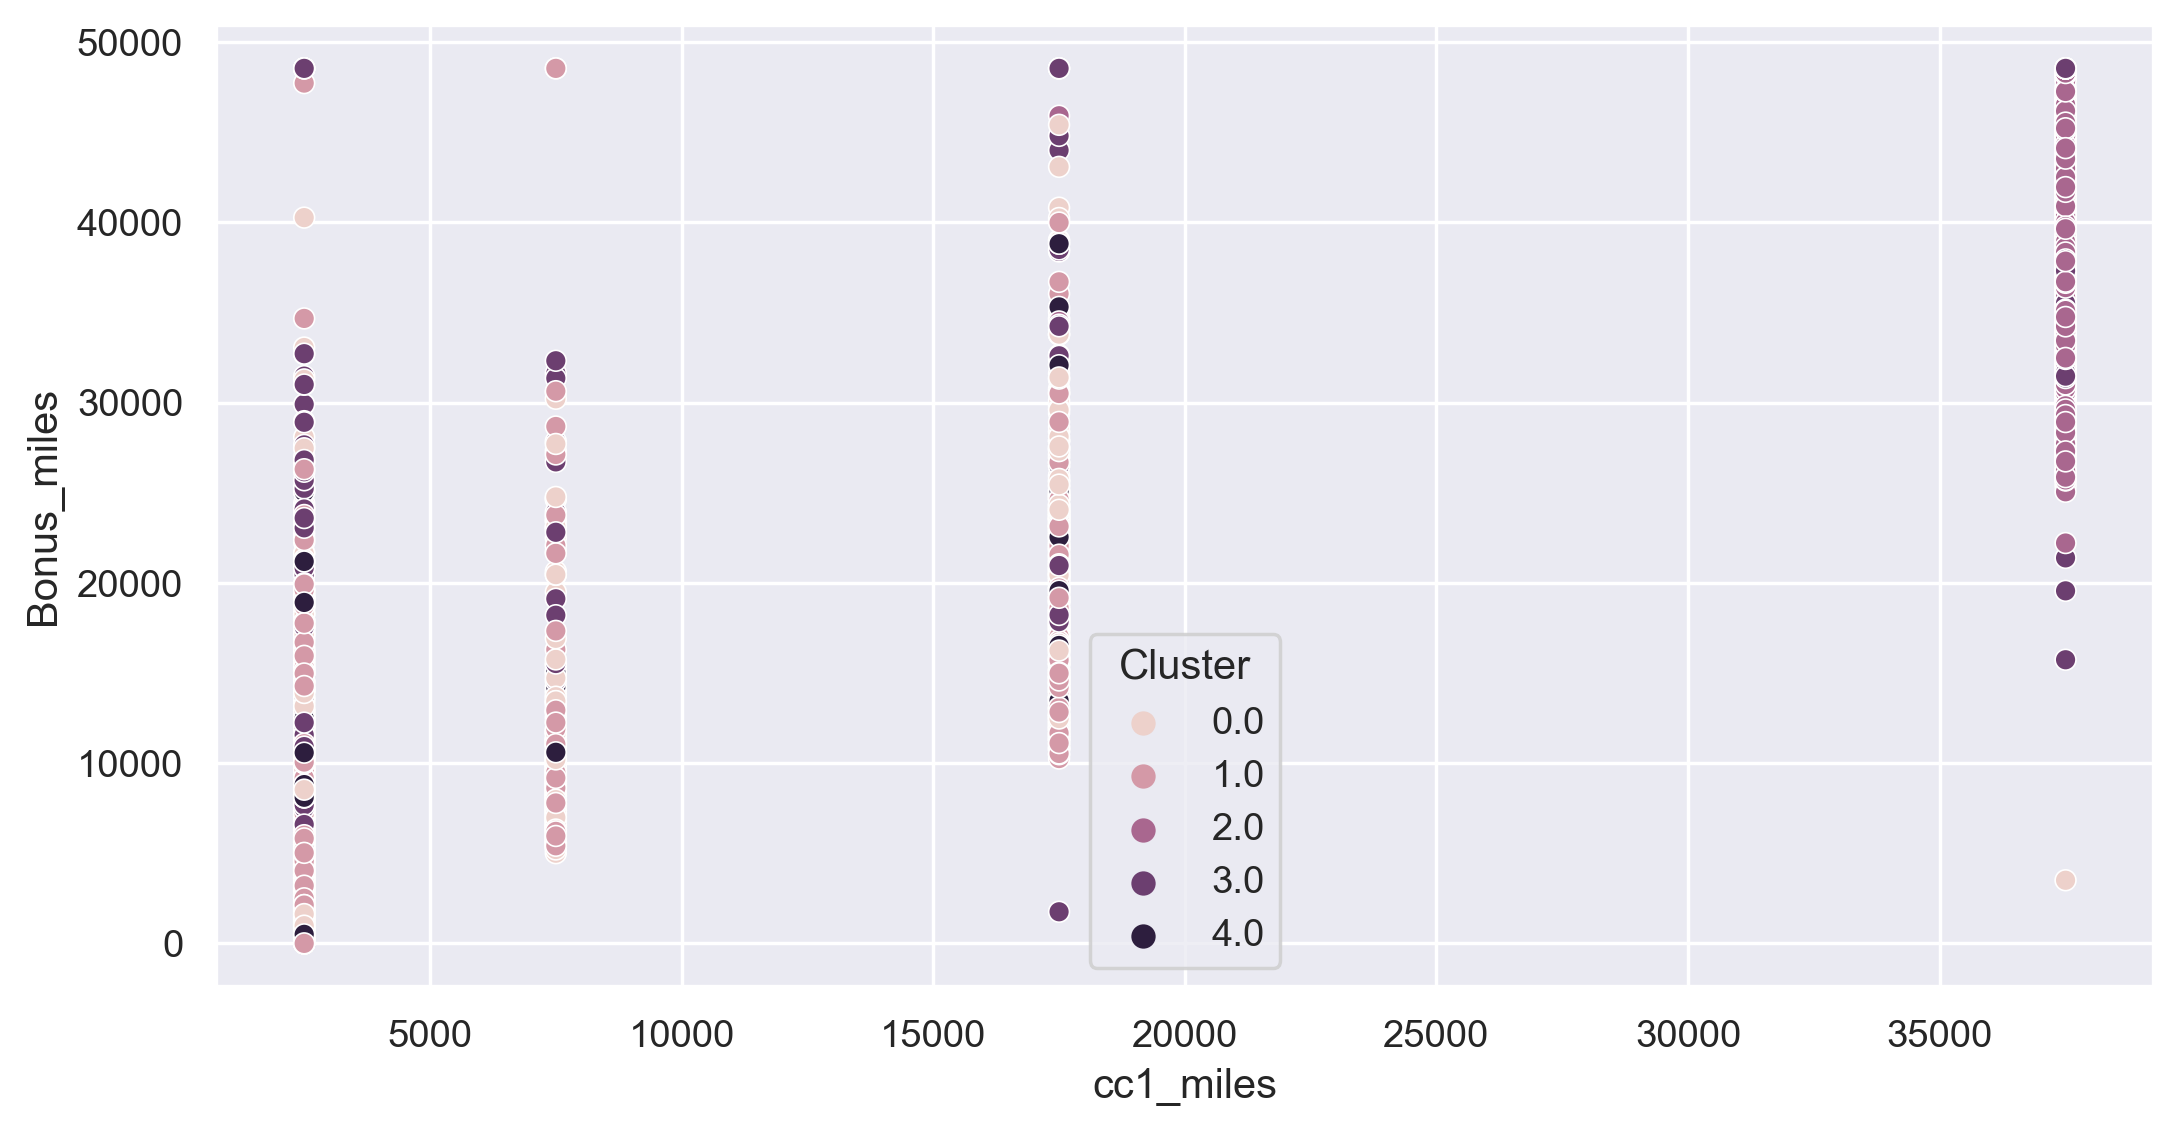

In [242]:
sns.scatterplot(x=df['cc1_miles'], y=df['Bonus_miles'], hue=df['Cluster'])

In [ ]:
## this shows one of the major drawback of hierarchial clustering that it is not good for large datasets and creates overlapping
## clusters with large data sets

# KMeans Clustering

In [212]:
from sklearn.cluster import KMeans

In [213]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [214]:
wcss

[31983.99999999999,
 21899.178686878633,
 17070.315069590695,
 14992.102412179665,
 13416.0707812223,
 11893.084071964238,
 10890.899576811345,
 10133.75276276652,
 9461.082094711839,
 8916.930311307284]

Text(0.5, 1.0, 'Elbow Graph')

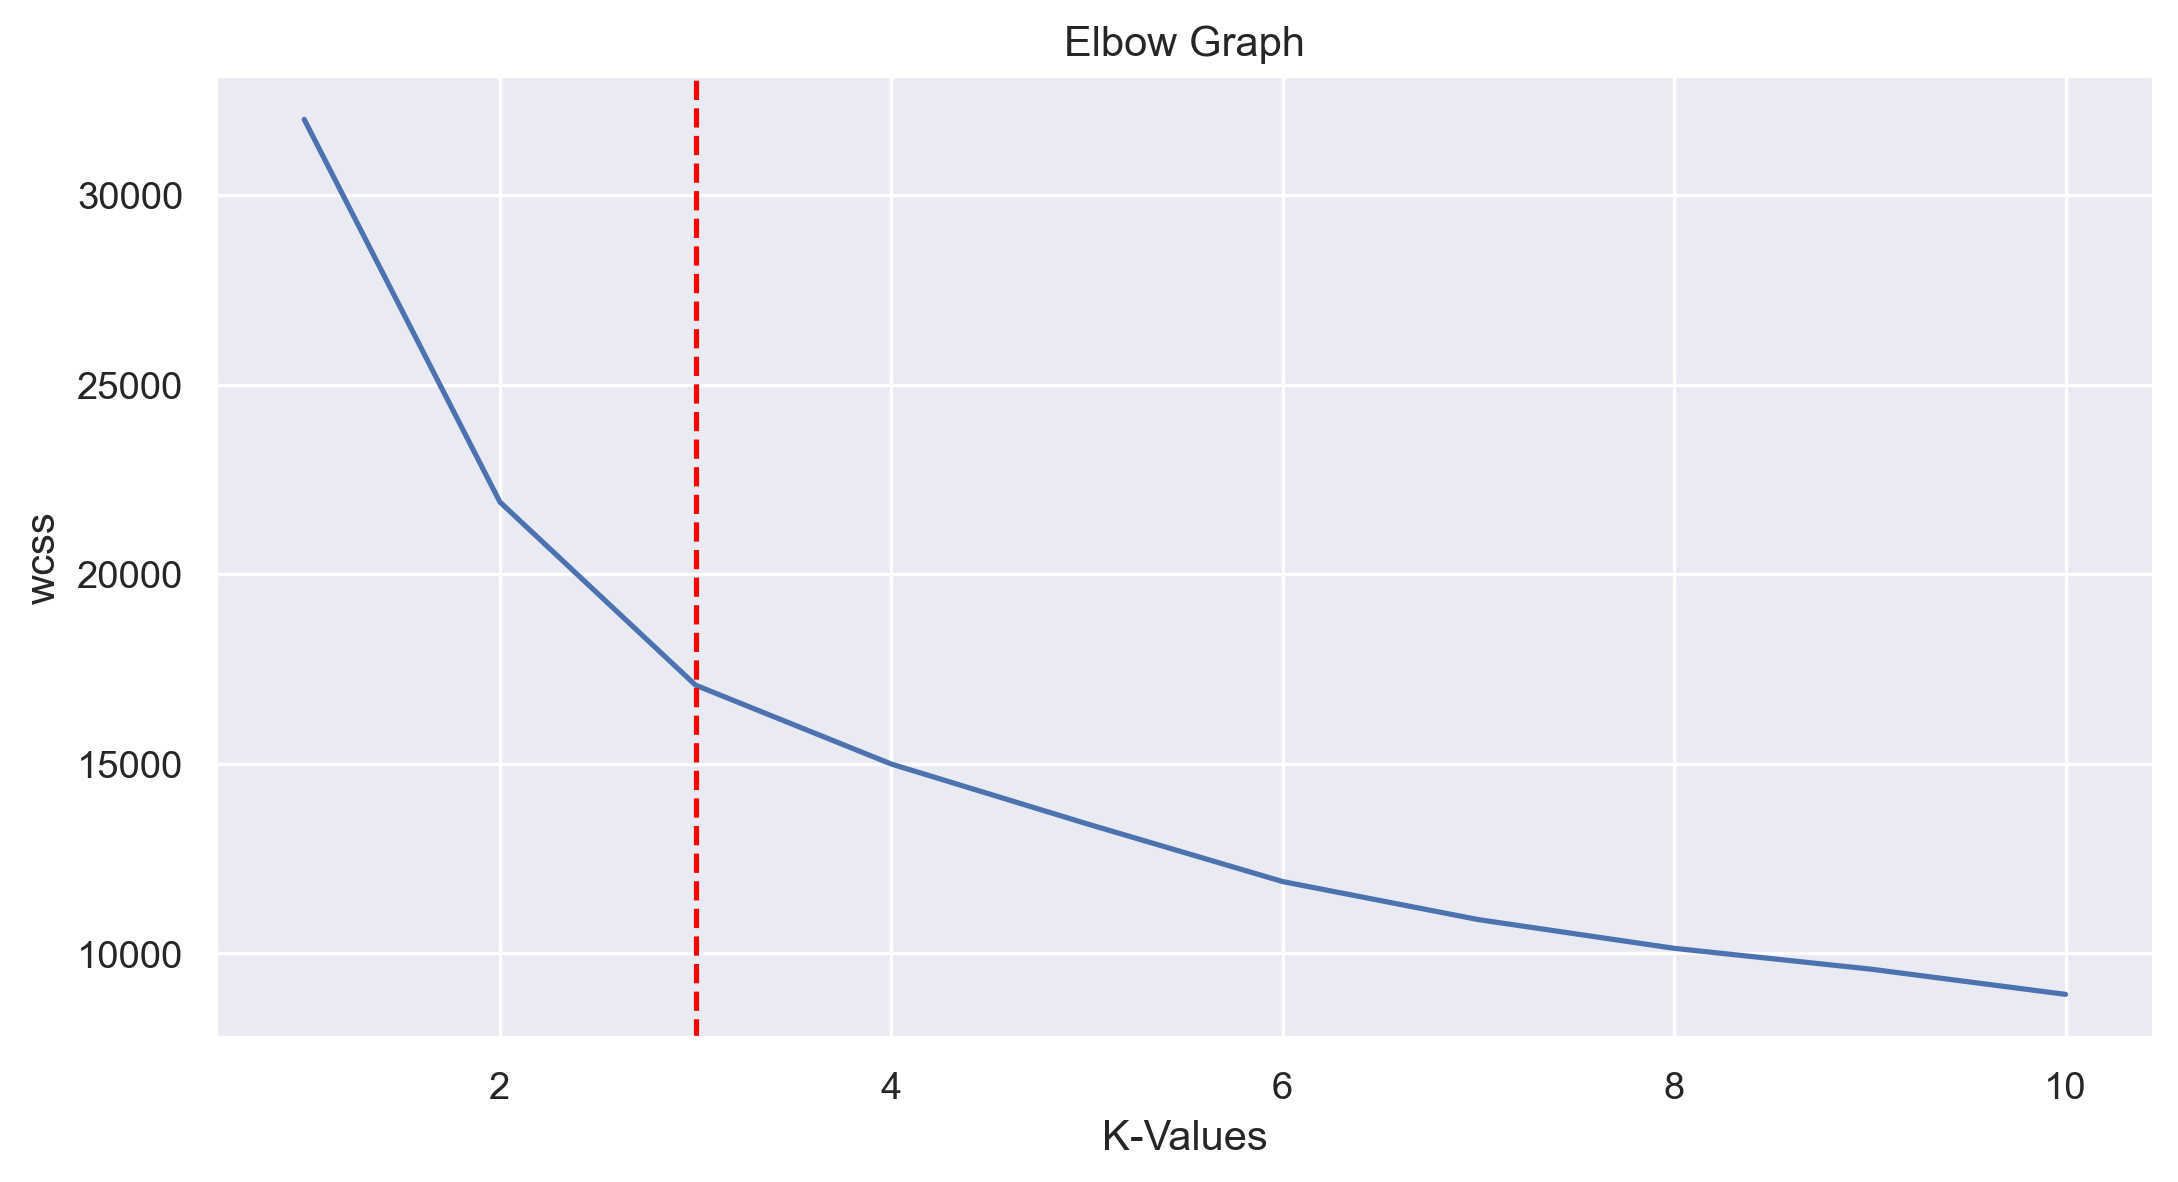

In [138]:
plt.plot(range(1,11),wcss)
plt.axvline(x=3, linestyle='--', color='red')
plt.xlabel('K-Values')
plt.ylabel('wcss')
plt.title('Elbow Graph')

In [48]:
## the ideal numbers of clusters should be 6 as seen from elbow graph

In [49]:
## model building

In [215]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(x)
yp

array([1, 1, 1, ..., 2, 1, 1])

In [51]:
## evaluation of kmeans

In [137]:
## calculating the silhouette score

from sklearn.metrics import silhouette_score
silhouette_score(x,yp)

0.3348043748494617

In [53]:
## from the silhouette score, we can say that clusters are moderately good

In [54]:
## analyzing the clusters

In [216]:
df['clusterK'] = yp
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1     28143.0         0.0     2500.0     2500.0     2500.0        174.0   
2     19244.0         0.0     2500.0     2500.0     2500.0        215.0   
3     41354.0         0.0     2500.0     2500.0     2500.0       4123.0   
4     14776.0         0.0     2500.0     2500.0     2500.0        500.0   
5     97752.0         0.0    37500.0     2500.0     2500.0      43300.0   
...       ...         ...        ...        ...        ...          ...   
4017  18476.0         0.0     2500.0     2500.0     2500.0       8525.0   
4018  64385.0         0.0     2500.0     2500.0     2500.0        981.0   
4019  73597.0         0.0    17500.0     2500.0     2500.0      25447.0   
4020  54899.0         0.0     2500.0     2500.0     2500.0        500.0   
4021   3016.0         0.0     2500.0     2500.0     2500.0          0.0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID#                                                                        
1             1.0                0.0              0.0               7000   
2             2.0                0.0              0.0               6968   
3             4.0                0.0              0.0               7034   
4             1.0                0.0              0.0               6952   
5            23.0             1246.5              4.0               6935   
...           ...                ...              ...                ...   
4017          4.0              200.0              1.0               1403   
4018          5.0                0.0              0.0               1395   
4019          8.0                0.0              0.0               1402   
4020          1.0              500.0              1.0               1401   
4021          0.0                0.0              0.0               1398   

      Award  Cluster  clusterK  
ID#                             
1         0        1         1  
2         0        1         1  
3         0        1         1  
4         0        1         1  
5         1        3         0  
...     ...      ...       ...  
4017      1        0         1  
4018      1        0         1  
4019      1        0         2  
4020      0        4         1  
4021      0        1         1  

[3998 rows x 13 columns]

In [217]:
df.groupby('clusterK').agg('mean')

Balance  Qual_miles     cc1_miles  cc2_miles  cc3_miles  \
clusterK                                                                 
0         91127.309206         0.0  13039.682540     2500.0     2500.0   
1         37300.994541         0.0   4111.785095     2500.0     2500.0   
2         92967.730000         0.0  29584.905660     2500.0     2500.0   

           Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
clusterK                                                                  
0         19264.653333    15.163492        1090.414286         3.506349   
1          4520.280719     6.655113          55.436958         0.203206   
2         33965.657075    17.070755         115.509906         0.380189   

          Days_since_enroll     Award   Cluster  
clusterK                                         
0               4565.719048  0.669841  3.112698  
1               3657.862652  0.189341  1.056326  
2               4858.275472  0.586792  1.400943

In [ ]:
## in cluster 0 there are higher number of passengers who awarded with free flights and in cluster1


<Axes: xlabel='cc1_miles', ylabel='Bonus_miles'>

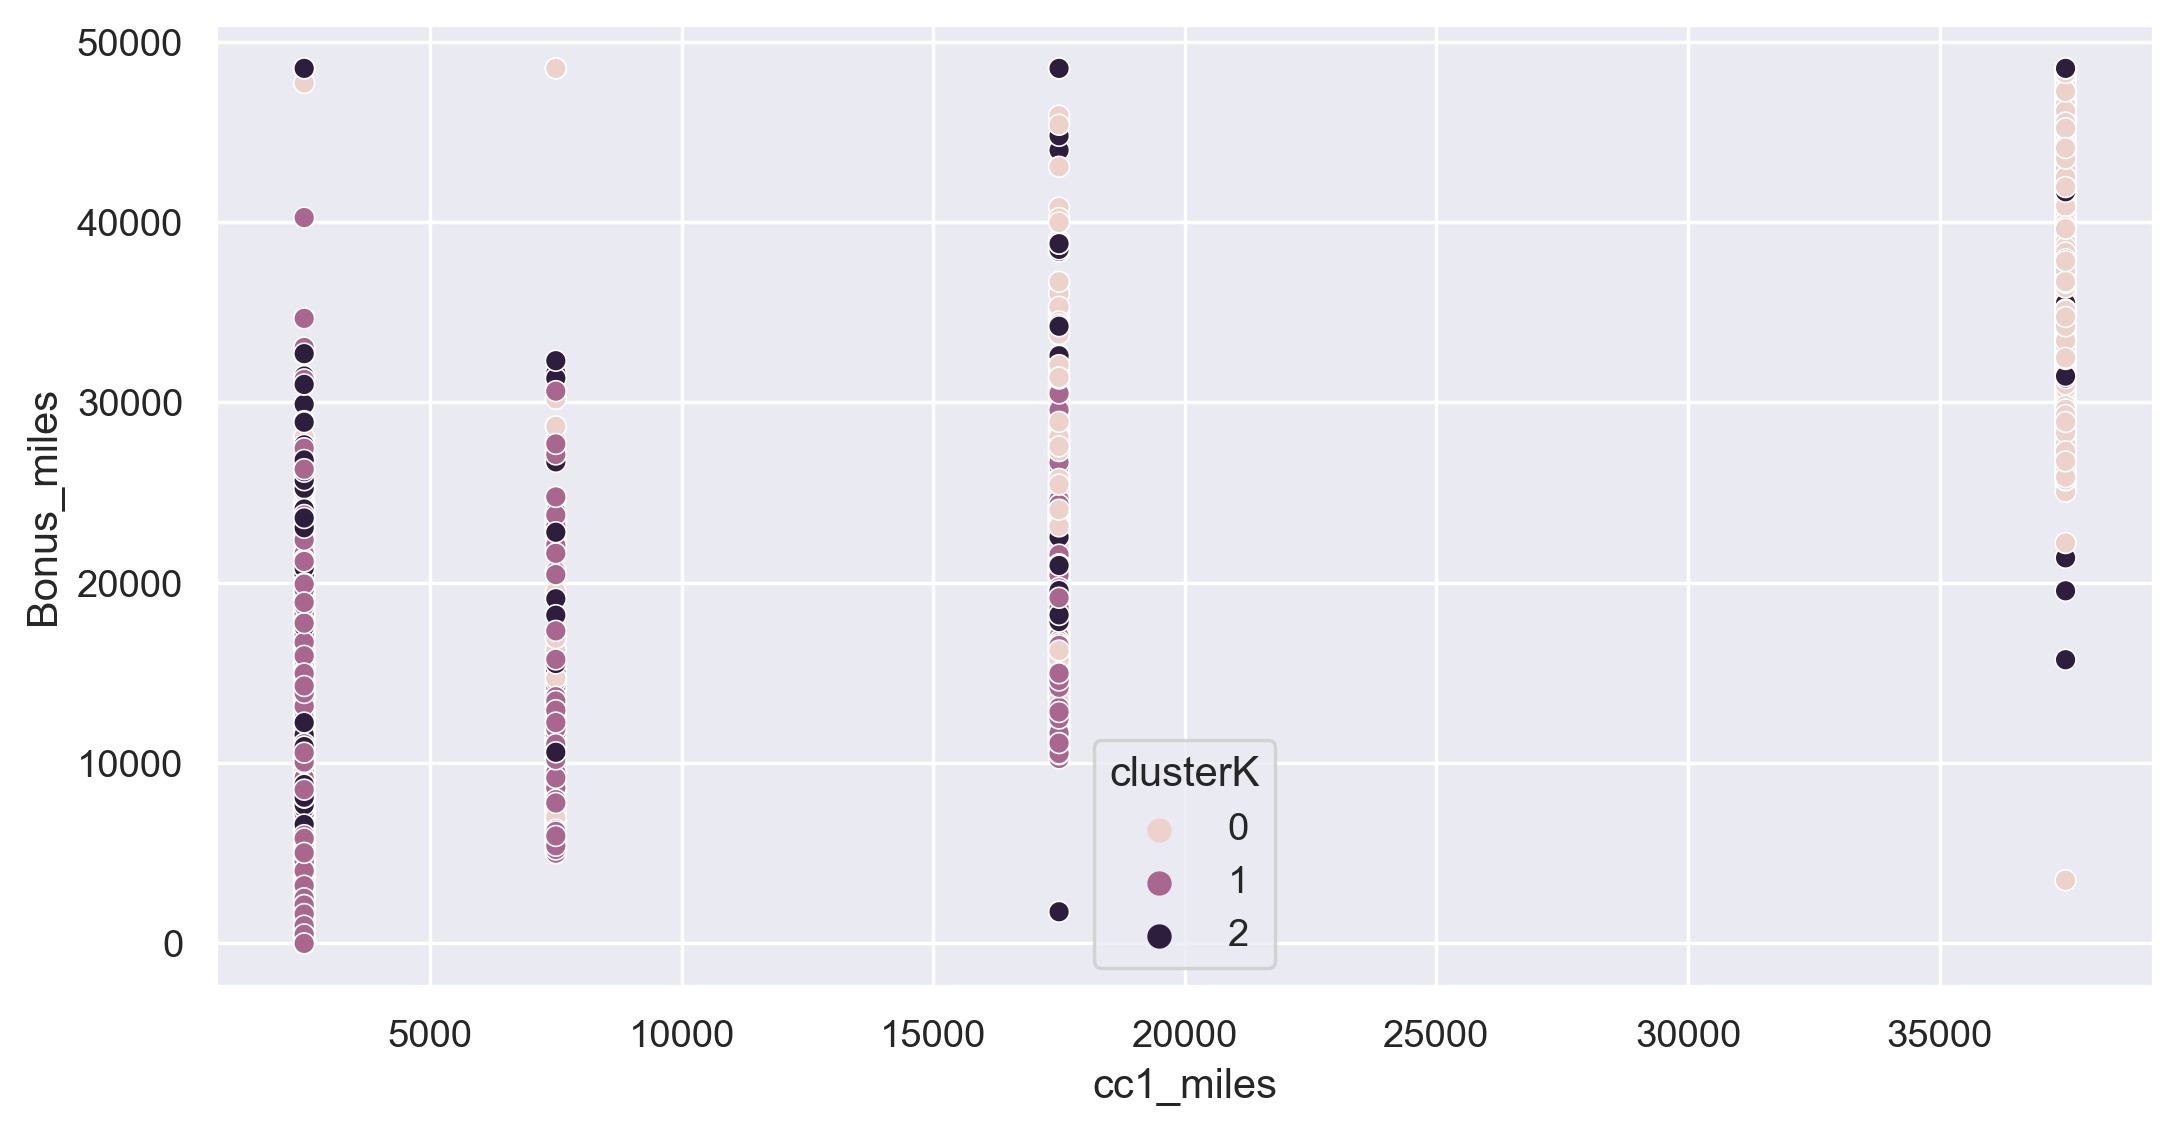

In [142]:
sns.scatterplot(x=df['cc1_miles'], y=df['Bonus_miles'], hue=df['clusterK'])

# DBSCAN

In [218]:

import numpy as np
from sklearn.cluster import DBSCAN

In [228]:

dbscan = DBSCAN(eps=1, min_samples=6)
y_pred = dbscan.fit_predict(x)

In [229]:
dbscan.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [230]:
cl=pd.DataFrame(dbscan.labels_,columns=['clusterD'])

In [231]:
cl

clusterD
0            0
1            0
2            0
3            0
4            1
...        ...
3993         2
3994         2
3995         2
3996         0
3997         0

[3998 rows x 1 columns]

In [240]:
df = pd.concat([df,cl],axis=1)
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
1     28143.0         0.0     2500.0     2500.0     2500.0        174.0   
2     19244.0         0.0     2500.0     2500.0     2500.0        215.0   
3     41354.0         0.0     2500.0     2500.0     2500.0       4123.0   
4     14776.0         0.0     2500.0     2500.0     2500.0        500.0   
5     97752.0         0.0    37500.0     2500.0     2500.0      43300.0   
...       ...         ...        ...        ...        ...          ...   
2639      NaN         NaN        NaN        NaN        NaN          NaN   
2716      NaN         NaN        NaN        NaN        NaN          NaN   
2718      NaN         NaN        NaN        NaN        NaN          NaN   
3259      NaN         NaN        NaN        NaN        NaN          NaN   
3899      NaN         NaN        NaN        NaN        NaN          NaN   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
1             1.0                0.0              0.0             7000.0   
2             2.0                0.0              0.0             6968.0   
3             4.0                0.0              0.0             7034.0   
4             1.0                0.0              0.0             6952.0   
5            23.0             1246.5              4.0             6935.0   
...           ...                ...              ...                ...   
2639          NaN                NaN              NaN                NaN   
2716          NaN                NaN              NaN                NaN   
2718          NaN                NaN              NaN                NaN   
3259          NaN                NaN              NaN                NaN   
3899          NaN                NaN              NaN                NaN   

      Award  Cluster  clusterK  clusterD  clusterD  clusterD  
1       0.0      1.0       1.0       0.0       0.0       0.0  
2       0.0      1.0       1.0       0.0       0.0       0.0  
3       0.0      1.0       1.0       0.0       0.0       0.0  
4       0.0      1.0       1.0       1.0       1.0       1.0  
5       1.0      3.0       0.0       0.0       0.0       0.0  
...     ...      ...       ...       ...       ...       ...  
2639    NaN      NaN       NaN       4.0       4.0       4.0  
2716    NaN      NaN       NaN       2.0       2.0       2.0  
2718    NaN      NaN       NaN       2.0       2.0       2.0  
3259    NaN      NaN       NaN       0.0       0.0       0.0  
3899    NaN      NaN       NaN       2.0       2.0       2.0  

[4022 rows x 16 columns]

In [233]:
silhouette_score(x,y_pred)

0.16111644047937737

In [ ]:
## the negative silhouette score indicates a dbscan does not resulted in a good algorithm.

In [ ]:
## ive experimented with different epsilon values and eps=1 gives the better silhouette score